In [2]:
#test LSTM  input 4D  open high low close
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# 1 Jan 2 Feb 3 Mar 4 Apr 5 May 6 Jun 7 Jul 8 Aug 9 Sep 10 Oct 11 Nov 12 Dec
def convert(str_Mn):
    if str_Mn == 'Jan': return '01'
    if str_Mn == 'Feb': return '02'
    if str_Mn == 'Mar': return '03'
    if str_Mn == 'Apr': return '04'
    if str_Mn == 'May': return '05'
    if str_Mn == 'Jun': return '06'
    if str_Mn == 'Jul': return '07'
    if str_Mn == 'Aug': return '08'
    if str_Mn == 'Sep': return '09'
    if str_Mn == 'Oct': return '10'
    if str_Mn == 'Nov': return '11'
    if str_Mn == 'Dec': return '12'
    
def compare_ym_D_M(i,j):    #compare_ym_D_M(D_index, Mn_index)
    ym_D=data_D['Date'][i]
    ym_D = ym_D[0:7]
    ym_Mn=data_Mn['Date'][j]
    ym_Mn = ym_Mn[0:7]
    
    if ym_D == ym_Mn:  return True
    else:  return False

print("now =", datetime.now())

now = 2020-07-05 16:59:03.164245


In [3]:
#load data and insert header ['Index','Time','Open','High','Low','Close','Volume']
H_=['Date','Close','Open','High','Low','%chg']

data_Mn=pd.read_csv('data/EUR_USD Historical Data Mn.csv')
data_Wk=pd.read_csv('data/EUR_USD Historical Data Wk.csv')
data_D=pd.read_csv('data/EUR_USD Historical Data D.csv')

print(data_Mn.head(2))
print(data_Mn.tail(2), '\n', '---------------------------------------------')
print(data_Mn.head(2))
print(data_Wk.tail(2), '\n', '---------------------------------------------')
print(data_D.tail(2))
print(data_D.tail(2), '\n', '---------------------------------------------')

print("now =", datetime.now())

     Date   Price    Open    High     Low Change %
0  Feb 75  1.3847  1.3847  1.3847  1.3847    2.78%
1  Mar 75  1.3561  1.3561  1.3561  1.3561   -2.07%
       Date   Price    Open    High     Low Change %
542  Apr 20  1.0957  1.1031  1.1040  1.0726   -0.67%
543  May 20  1.1099  1.0956  1.1146  1.0766    1.30% 
 ---------------------------------------------
     Date   Price    Open    High     Low Change %
0  Feb 75  1.3847  1.3847  1.3847  1.3847    2.78%
1  Mar 75  1.3561  1.3561  1.3561  1.3561   -2.07%
              Date   Price    Open    High     Low Change %
2369  May 31, 2020  1.1286  1.1097  1.1385  1.1095    1.68%
2370  Jun 07, 2020  1.1256  1.1289  1.1423  1.1212   -0.27% 
 ---------------------------------------------
               Date   Price    Open    High     Low Change %
10494  Jun 17, 2020  1.1244  1.1264  1.1295  1.1207   -0.17%
10495  Jun 18, 2020  1.1204  1.1244  1.1264  1.1185   -0.36%
               Date   Price    Open    High     Low Change %
10494  Jun 17, 

In [4]:
#  -------------------------- Mn convert  Jan 10  to  2010.01.01 -----------------------------------
#"Date","Price","Open","High","Low","Change %"  ===> Mn
#"Jan 10","1.3863","1.4326","1.4584","1.3861","-3.18%"
 
print(data_Mn.head())
#print(type(data_Mn['Date'][1]))

print('data_Mn.shape ',data_Mn.shape[0])

for i in range(data_Mn.shape[0]):
    Adj = '20' + data_Mn['Date'][i][4:] + '.' + convert(data_Mn['Date'][i][:3]) + '.' + '01'
    #print(type(Adj))
    data_Mn['Date'][i] = Adj
    
print(data_Mn.head(), '\n')
# ------------------------------  Wk   Jan 03, 2010",   to   2010.01.03 ---------------------------------
#"Date","Price","Open","High","Low","Change %"  ===> Wk
#"Jan 03, 2010","1.4413","1.4324","1.4484","1.4257","0.61%"

print(data_Wk.head())

print('data_Wk.shape ',data_Wk.shape[0])

for i in range(data_Wk.shape[0]):
    Adj_Wk = data_Wk['Date'][i][8:] + '.' + convert(data_Wk['Date'][i][:3]) + '.' + data_Wk['Date'][i][4:6]
    #print(type(Adj), i)
    data_Wk['Date'][i] = Adj_Wk
    
print(data_Wk.head(), '\n')

# ------------------------------  D   Jan 01, 2010",   to   2010.01.03 ---------------------------------
# "Date","Price","Open","High","Low","Change %"  ===> D
# "Jan 01, 2010","1.4326","1.4328","1.4330","1.4322","0.06%"

print(data_D.head())

print('data_D.shape ',data_D.shape[0])

for i in range(data_D.shape[0]):
    Adj_D = data_D['Date'][i][8:] + '.' + convert(data_D['Date'][i][:3]) + '.' + data_D['Date'][i][4:6]
    #print(type(Adj), i)
    data_D['Date'][i] = Adj_D
    
print(data_D.head(), '\n')

     Date   Price    Open    High     Low Change %
0  Feb 75  1.3847  1.3847  1.3847  1.3847    2.78%
1  Mar 75  1.3561  1.3561  1.3561  1.3561   -2.07%
2  Apr 75  1.3524  1.3524  1.3524  1.3524   -0.27%
3  May 75  1.3708  1.3708  1.3708  1.3708    1.36%
4  Jun 75  1.3622  1.3622  1.3622  1.3622   -0.63%
data_Mn.shape  544
         Date   Price    Open    High     Low Change %
0  2075.02.01  1.3847  1.3847  1.3847  1.3847    2.78%
1  2075.03.01  1.3561  1.3561  1.3561  1.3561   -2.07%
2  2075.04.01  1.3524  1.3524  1.3524  1.3524   -0.27%
3  2075.05.01  1.3708  1.3708  1.3708  1.3708    1.36%
4  2075.06.01  1.3622  1.3622  1.3622  1.3622   -0.63% 

           Date   Price    Open    High     Low Change %
0  Jan 05, 1975  1.3273  1.3273  1.3273  1.3273    0.68%
1  Jan 12, 1975  1.3268  1.3268  1.3268  1.3268   -0.04%
2  Jan 19, 1975  1.3543  1.3543  1.3543  1.3543    2.07%
3  Jan 26, 1975  1.3472  1.3472  1.3472  1.3472   -0.52%
4  Feb 02, 1975  1.3374  1.3374  1.3374  1.3374   -0.73%
d

C:\Users\admin\anaconda3\envs\LSTM1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\admin\anaconda3\envs\LSTM1\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


         Date   Price    Open    High     Low Change %
0  1975.01.05  1.3273  1.3273  1.3273  1.3273    0.68%
1  1975.01.12  1.3268  1.3268  1.3268  1.3268   -0.04%
2  1975.01.19  1.3543  1.3543  1.3543  1.3543    2.07%
3  1975.01.26  1.3472  1.3472  1.3472  1.3472   -0.52%
4  1975.02.02  1.3374  1.3374  1.3374  1.3374   -0.73% 

           Date   Price    Open    High     Low Change %
0  Dec 27, 1979  1.5074  1.5074  1.5074  1.5074    0.41%
1  Dec 28, 1979  1.5076  1.5076  1.5076  1.5076    0.01%
2  Dec 31, 1979  1.5081  1.5081  1.5081  1.5081    0.03%
3  Jan 02, 1980  1.5149  1.5149  1.5149  1.5149    0.45%
4  Jan 03, 1980  1.5177  1.5177  1.5177  1.5177    0.18%
data_D.shape  10496


C:\Users\admin\anaconda3\envs\LSTM1\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


         Date   Price    Open    High     Low Change %
0  1979.12.27  1.5074  1.5074  1.5074  1.5074    0.41%
1  1979.12.28  1.5076  1.5076  1.5076  1.5076    0.01%
2  1979.12.31  1.5081  1.5081  1.5081  1.5081    0.03%
3  1980.01.02  1.5149  1.5149  1.5149  1.5149    0.45%
4  1980.01.03  1.5177  1.5177  1.5177  1.5177    0.18% 



In [5]:
print(type(data_Mn),'Mn.shape=',data_Mn.shape)
print(data_Mn.info(), '\n')
print(type(data_Wk),'Wk.shape=',data_Wk.shape)
print(data_Wk.info(), '\n')
print(type(data_D),'D.shape=',data_D.shape)
print(data_D.info(), '\n')

<class 'pandas.core.frame.DataFrame'> Mn.shape= (544, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      544 non-null    object 
 1   Price     544 non-null    float64
 2   Open      544 non-null    float64
 3   High      544 non-null    float64
 4   Low       544 non-null    float64
 5   Change %  544 non-null    object 
dtypes: float64(4), object(2)
memory usage: 25.6+ KB
None 

<class 'pandas.core.frame.DataFrame'> Wk.shape= (2371, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2371 non-null   object 
 1   Price     2371 non-null   float64
 2   Open      2371 non-null   float64
 3   High      2371 non-null   float64
 4   Low       2371 non-null   float64
 5   Change %  2371 non-null  

In [6]:
#---------------------------- predata to serie data for Mn=  pre_data_Mn ----------------------------
#---------------------------- predata to serie data for Wk =  pre_data_Wk ---------------------------
#---------------------------- predata to serie data for D =  pre_data_All ------------------------------
#---------------------------------------------------------------------------------------------------------------
pre_data_Mn = []
pre_data_Wk =[]
pre_data_D =[]

for Mn_index in range(len(data_Mn['Date'])):
    
    pre_data_Mn.append(data_Mn['Open'][Mn_index])
    pre_data_Mn.append(data_Mn['High'][Mn_index])
    pre_data_Mn.append(data_Mn['Low'][Mn_index])
    pre_data_Mn.append(data_Mn['Price'][Mn_index])
    
for Wk_index in range(len(data_Wk['Date'])):
    
    pre_data_Wk.append(data_Wk['Open'][Wk_index])
    pre_data_Wk.append(data_Wk['High'][Wk_index])
    pre_data_Wk.append(data_Wk['Low'][Wk_index])
    pre_data_Wk.append(data_Wk['Price'][Wk_index])

for D_index in range(len(data_D['Date'])):
    
    pre_data_D.append(data_D['Open'][D_index])
    pre_data_D.append(data_D['High'][D_index])
    pre_data_D.append(data_D['Low'][D_index])
    pre_data_D.append(data_D['Price'][D_index])
        
print(datetime.now())   
#---------------------  reshape to array  (none, 4)------------------------------

#print('pre_data_Mn 12x3 first:', '\n', pre_data_Mn[:12],'\n', pre_data_Mn[-12:])
#print('pre_data_Wk 12x3 first:', '\n', pre_data_Wk[:12],'\n', pre_data_Wk[-12:])
#print('pre_data_D 12x3 first:', '\n', pre_data_D[:20],'\n', pre_data_D[-20:])

pre_data_Mn = np.asarray(pre_data_Mn).reshape( int(len(pre_data_Mn)/4), 4 ) 
print('pre_data_Mn Reshape:','\n', pre_data_Mn)
print(' Reshape: ', pre_data_Mn.shape,'\n')

pre_data_Wk = np.asarray(pre_data_Wk).reshape( int(len(pre_data_Wk)/4), 4 ) 
print('pre_data_Wk Reshape:','\n', pre_data_Wk)
print(' Reshape: ', pre_data_Wk.shape,'\n')

pre_data_D = np.asarray(pre_data_D).reshape( int(len(pre_data_D)/4), 4 ) 
print('pre_data_D Reshape:','\n', pre_data_D)
print(' Reshape: ', pre_data_D.shape,'\n')


2020-07-05 16:59:27.314627
pre_data_Mn Reshape: 
 [[1.3847 1.3847 1.3847 1.3847]
 [1.3561 1.3561 1.3561 1.3561]
 [1.3524 1.3524 1.3524 1.3524]
 ...
 [1.1003 1.1494 1.0637 1.1031]
 [1.1031 1.104  1.0726 1.0957]
 [1.0956 1.1146 1.0766 1.1099]]
 Reshape:  (544, 4) 

pre_data_Wk Reshape: 
 [[1.3273 1.3273 1.3273 1.3273]
 [1.3268 1.3268 1.3268 1.3268]
 [1.3543 1.3543 1.3543 1.3543]
 ...
 [1.0903 1.1146 1.087  1.1099]
 [1.1097 1.1385 1.1095 1.1286]
 [1.1289 1.1423 1.1212 1.1256]]
 Reshape:  (2371, 4) 

pre_data_D Reshape: 
 [[1.5074 1.5074 1.5074 1.5074]
 [1.5076 1.5076 1.5076 1.5076]
 [1.5081 1.5081 1.5081 1.5081]
 ...
 [1.1325 1.1353 1.1228 1.1264]
 [1.1264 1.1295 1.1207 1.1244]
 [1.1244 1.1264 1.1185 1.1204]]
 Reshape:  (10496, 4) 



In [7]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  LSTM Mn-----================
X_train_Mn=[]
Y_train_Mn=[]
X_predict_Mn=[]

windows = 12

for i in range(windows, len(pre_data_Mn)-1) :
    
        X_train_Mn.append(pre_data_Mn[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_Mn.append(pre_data_Mn[i,:])                                      # output    Mn [OHLC]
        
        if i == len(pre_data_Mn)-2 : 
            j= i+2
            X_predict_Mn.append(pre_data_Mn[j-windows:j,:])               # input  predict    Mn [OHLC]
 
print('X predict ', X_predict_Mn,'\n')                    
print('------------------------------------')

    #------ to 3D input LSTM ------------

X_train_Mn, X_predict_Mn, Y_train_Mn = np.array(X_train_Mn), np.array(X_predict_Mn), np.array(Y_train_Mn)

print('X_train_Mn.shape=',X_train_Mn.shape)
print('X_predict_Mn.shape=',X_predict_Mn.shape)
print('Y_train_Mn.shape=',Y_train_Mn.shape,'\n')

X_train_Mn=np.reshape(X_train_Mn, (X_train_Mn.shape[0], X_train_Mn.shape[1], X_train_Mn.shape[2]))
X_predict_Mn=np.reshape(X_predict_Mn, (X_predict_Mn.shape[0], X_predict_Mn.shape[1], X_predict_Mn.shape[2]))

print('X_train_Mn.shape ', X_train_Mn.shape)
print('X_train_Mn ', X_train_Mn)
print('Y_train_Mn ', Y_train_Mn)
print('X_predict_Mn ', X_predict_Mn)

X predict  [array([[1.1169, 1.1414, 1.1156, 1.137 ],
       [1.1376, 1.1376, 1.1059, 1.1076],
       [1.1076, 1.1251, 1.0963, 1.0991],
       [1.099 , 1.1111, 1.0885, 1.09  ],
       [1.0901, 1.1181, 1.0879, 1.1152],
       [1.1152, 1.1177, 1.0981, 1.1017],
       [1.1014, 1.1241, 1.1003, 1.1212],
       [1.1213, 1.1226, 1.0991, 1.1094],
       [1.1093, 1.1097, 1.0776, 1.1026],
       [1.1003, 1.1494, 1.0637, 1.1031],
       [1.1031, 1.104 , 1.0726, 1.0957],
       [1.0956, 1.1146, 1.0766, 1.1099]])] 

------------------------------------
X_train_Mn.shape= (531, 12, 4)
X_predict_Mn.shape= (1, 12, 4)
Y_train_Mn.shape= (531, 4) 

X_train_Mn.shape  (531, 12, 4)
X_train_Mn  [[[1.3847 1.3847 1.3847 1.3847]
  [1.3561 1.3561 1.3561 1.3561]
  [1.3524 1.3524 1.3524 1.3524]
  ...
  [1.2346 1.2346 1.2346 1.2346]
  [1.2356 1.2356 1.2356 1.2356]
  [1.2228 1.2228 1.2228 1.2228]]

 [[1.3561 1.3561 1.3561 1.3561]
  [1.3524 1.3524 1.3524 1.3524]
  [1.3708 1.3708 1.3708 1.3708]
  ...
  [1.2356 1.2356 1.

In [8]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  LSTM Wk-----================
X_train_Wk=[]
Y_train_Wk=[]
X_predict_Wk=[]

windows = 12

for i in range(windows, len(pre_data_Wk)-1) :
    
        X_train_Wk.append(pre_data_Wk[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_Wk.append(pre_data_Wk[i,:])                                      # output    Mn [OHLC]
        
        if i == len(pre_data_Wk)-2 : 
            j= i+2
            X_predict_Wk.append(pre_data_Wk[j-windows:j,:])               # input  predict    Mn [OHLC]
 
print('X predict Wk ', X_predict_Wk,'\n')                    
print('------------------------------------')

    #------ to 3D input LSTM ------------

X_train_Wk, X_predict_Wk, Y_train_Wk = np.array(X_train_Wk), np.array(X_predict_Wk), np.array(Y_train_Wk)

print('X_train_Wk.shape=',X_train_Wk.shape)
print('X_predict_Wk.shape=',X_predict_Wk.shape)
print('Y_train_Wk.shape=',Y_train_Wk.shape,'\n')

X_train_Wk=np.reshape(X_train_Wk, (X_train_Wk.shape[0], X_train_Wk.shape[1], X_train_Wk.shape[2]))
X_predict_Wk=np.reshape(X_predict_Wk, (X_predict_Wk.shape[0], X_predict_Wk.shape[1], X_predict_Wk.shape[2]))

print('X_train_Wk.shape ', X_train_Wk.shape)
print('X_train_Wk ', X_train_Wk)
print('Y_train_Wk ', Y_train_Wk)
print('X_predict_Wk ', X_predict_Wk)

X predict Wk  [array([[1.0696, 1.1148, 1.0637, 1.1142],
       [1.1136, 1.1145, 1.0773, 1.0809],
       [1.0813, 1.0953, 1.0768, 1.0936],
       [1.0941, 1.0991, 1.0812, 1.0878],
       [1.0875, 1.0898, 1.0726, 1.0821],
       [1.0809, 1.1019, 1.0808, 1.0985],
       [1.098 , 1.098 , 1.0766, 1.0841],
       [1.0838, 1.0897, 1.0775, 1.0816],
       [1.0816, 1.101 , 1.0799, 1.0902],
       [1.0903, 1.1146, 1.087 , 1.1099],
       [1.1097, 1.1385, 1.1095, 1.1286],
       [1.1289, 1.1423, 1.1212, 1.1256]])] 

------------------------------------
X_train_Wk.shape= (2358, 12, 4)
X_predict_Wk.shape= (1, 12, 4)
Y_train_Wk.shape= (2358, 4) 

X_train_Wk.shape  (2358, 12, 4)
X_train_Wk  [[[1.3273 1.3273 1.3273 1.3273]
  [1.3268 1.3268 1.3268 1.3268]
  [1.3543 1.3543 1.3543 1.3543]
  ...
  [1.3682 1.3682 1.3682 1.3682]
  [1.3686 1.3686 1.3686 1.3686]
  [1.3561 1.3561 1.3561 1.3561]]

 [[1.3268 1.3268 1.3268 1.3268]
  [1.3543 1.3543 1.3543 1.3543]
  [1.3472 1.3472 1.3472 1.3472]
  ...
  [1.3686 1.3

In [9]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  LSTM D-----================
X_train_D=[]
Y_train_D=[]
X_predict_D=[]

windows = 12

for i in range(windows, len(pre_data_D)-1) :
    
        X_train_D.append(pre_data_D[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_D.append(pre_data_D[i,:])                                      # output    Mn [OHLC]
        
        if i == len(pre_data_D)-2 : 
            j= i+2
            X_predict_D.append(pre_data_D[j-windows:j,:])               # input  predict    Mn [OHLC]
 
print('X predict D ', X_predict_D,'\n')                    
print('------------------------------------')

    #------ to 3D input LSTM ------------

X_train_D, X_predict_D, Y_train_D = np.array(X_train_D), np.array(X_predict_D), np.array(Y_train_D)

print('X_train_D.shape=',X_train_D.shape)
print('X_predict_D.shape=',X_predict_D.shape)
print('Y_train_D.shape=',Y_train_D.shape,'\n')

X_train_D=np.reshape(X_train_D, (X_train_D.shape[0], X_train_D.shape[1], X_train_D.shape[2]))
X_predict_d=np.reshape(X_predict_D, (X_predict_D.shape[0], X_predict_D.shape[1], X_predict_D.shape[2]))

print('X_train_D.shape ', X_train_D.shape)
#print('X_train_D ', X_train_D)
print('Y_train_D shape ', Y_train_D.shape)
print('Y_train_D ', '\n', Y_train_D[-5:])
#print('X_predict_D ', X_predict_D)

X predict D  [array([[1.1172, 1.1257, 1.1166, 1.1234],
       [1.1234, 1.1363, 1.1194, 1.1338],
       [1.1337, 1.1385, 1.1278, 1.1286],
       [1.1289, 1.1321, 1.1267, 1.1294],
       [1.1297, 1.1365, 1.1241, 1.1342],
       [1.134 , 1.1423, 1.1322, 1.1371],
       [1.1373, 1.1404, 1.1287, 1.1299],
       [1.1299, 1.1341, 1.1212, 1.1256],
       [1.1245, 1.1334, 1.1226, 1.1324],
       [1.1325, 1.1353, 1.1228, 1.1264],
       [1.1264, 1.1295, 1.1207, 1.1244],
       [1.1244, 1.1264, 1.1185, 1.1204]])] 

------------------------------------
X_train_D.shape= (10483, 12, 4)
X_predict_D.shape= (1, 12, 4)
Y_train_D.shape= (10483, 4) 

X_train_D.shape  (10483, 12, 4)
Y_train_D shape  (10483, 4)
Y_train_D  
 [[1.1373 1.1404 1.1287 1.1299]
 [1.1299 1.1341 1.1212 1.1256]
 [1.1245 1.1334 1.1226 1.1324]
 [1.1325 1.1353 1.1228 1.1264]
 [1.1264 1.1295 1.1207 1.1244]]


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from keras.models import load_model
from keras.callbacks import ModelCheckpoint

print(datetime.now())

Using TensorFlow backend.


2020-07-05 16:59:52.912091


#  Temp  to run medel all (Mn  Wk  D)

#   Temp  to run medel all (Mn  Wk  D) =================

# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =12 Mn = 1 yr     output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict Mn ================
n_node = 72      # node unit     Mn Wk D
D_O = 0.33         # Drop Out   Mn Wk D
ep_All = 1            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Mn.shape[1]
n_features_input = X_train_Mn.shape[2]
n_step_out =  Y_train_Mn.shape[1]
n_features_output = Y_train_Mn.shape[1]

model_Mn = Sequential()
model_Mn.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input) ) )
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, return_sequences=True))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, activation='sigmoid', return_sequences=False))
model_Mn.add(Dropout(D_O))

model_Mn.add(Dense(n_step_out))     # layer output  1 set  then last layer must to data 2D (no return sequence)
model_Mn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
               
# define the checkpoint
filepath_Mn = "model_OHLC_Mn.h5"
checkpoint = ModelCheckpoint(filepath_Mn, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model_Mn.fit(X_train_Mn, Y_train_Mn,
                       validation_split=0.2, 
                       epochs=ep_All, 
                       verbose=1, 
                       batch_size=50, 
                       callbacks=callbacks_list)

time_2=datetime.now()

print('\n', '................End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =12 wk = 1Q    output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict Wk ================
n_node=72    # node unit     Mn Wk D
D_O=0.33         # Drop Out   Mn Wk D
ep_All=1            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Wk.shape[1]
n_features_input = X_train_Wk.shape[2]
n_step_out =  Y_train_Wk.shape[1]
n_features_output = Y_train_Wk.shape[1]

model_Wk = Sequential()
model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input)))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='sigmoid', return_sequences=False))
model_Wk.add(Dropout(D_O))

model_Wk.add(Dense(n_features_output))

model_Wk.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_Wk = "model_OHLC_Wk.h5"
checkpoint = ModelCheckpoint(filepath_Wk, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_Wk = model_Wk.fit(X_train_Wk, Y_train_Wk, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('\n', '....................................... End Wk .....................................................')

print('time model_All = ', time_2 - time_1)

# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =20 D = 1 Mn     output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict D ================
n_node=120    # node unit     Mn Wk D
D_O=0.33         # Drop Out   Mn Wk D
ep_All=1           #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_D.shape[1]
n_features_input = X_train_D.shape[2]
n_step_out =  Y_train_D.shape[1]
n_features_output = Y_train_D.shape[1]

model_D = Sequential()
model_D.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input)))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=True))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=False))
model_D.add(Dropout(D_O))

model_D.add(Dense(n_features_output))

model_D.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_D = "model_OHLC_D.h5"
checkpoint = ModelCheckpoint(filepath_D, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_D = model_D.fit(X_train_D, Y_train_D, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('....................................... End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

In [16]:
# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =12 Mn = 1 yr     output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict Mn ================
n_node = 72      # node unit     Mn Wk D
D_O = 0.33         # Drop Out   Mn Wk D
ep_All = 1000            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Mn.shape[1]
n_features_input = X_train_Mn.shape[2]
n_step_out =  Y_train_Mn.shape[1]
n_features_output = Y_train_Mn.shape[1]

model_Mn = Sequential()
model_Mn.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input) ) )
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, return_sequences=True))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, activation='relu', return_sequences=False))
model_Mn.add(Dropout(D_O))

model_Mn.add(Dense(n_step_out))     # layer output  1 set  then last layer must to data 2D (no return sequence)
model_Mn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
               
# define the checkpoint
filepath_Mn = "model_OHLC_Mn.h5"
checkpoint = ModelCheckpoint(filepath_Mn, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_Mn = model_Mn.fit(X_train_Mn, Y_train_Mn,
                       validation_split=0.2, 
                       epochs=ep_All, 
                       verbose=1, 
                       batch_size=50, 
                       callbacks=callbacks_list)

time_2=datetime.now()

print('\n', '................End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

model_Mn.summary()

Train on 424 samples, validate on 107 samples
Epoch 1/1000
424/424 [==============================] - 2s 4ms/step - loss: 1.0798 - accuracy: 0.2524 - val_loss: 0.3608 - val_accuracy: 0.0093

Epoch 00001: loss improved from inf to 1.07984, saving model to model_OHLC_Mn.h5
Epoch 2/1000
424/424 [==============================] - 0s 575us/step - loss: 0.2522 - accuracy: 0.2288 - val_loss: 0.0824 - val_accuracy: 0.0093

Epoch 00002: loss improved from 1.07984 to 0.25225, saving model to model_OHLC_Mn.h5
Epoch 3/1000
424/424 [==============================] - 0s 572us/step - loss: 0.1784 - accuracy: 0.2854 - val_loss: 0.0301 - val_accuracy: 0.9907

Epoch 00003: loss improved from 0.25225 to 0.17838, saving model to model_OHLC_Mn.h5
Epoch 4/1000
424/424 [==============================] - 0s 603us/step - loss: 0.1042 - accuracy: 0.2429 - val_loss: 0.0065 - val_accuracy: 0.0000e+00

Epoch 00004: loss improved from 0.17838 to 0.10422, saving model to model_OHLC_Mn.h5
Epoch 5/1000
424/424 [======


Epoch 00038: loss improved from 0.03941 to 0.03893, saving model to model_OHLC_Mn.h5
Epoch 39/1000
424/424 [==============================] - 0s 603us/step - loss: 0.0368 - accuracy: 0.2571 - val_loss: 0.0054 - val_accuracy: 0.9907

Epoch 00039: loss improved from 0.03893 to 0.03675, saving model to model_OHLC_Mn.h5
Epoch 40/1000
424/424 [==============================] - 0s 669us/step - loss: 0.0362 - accuracy: 0.2925 - val_loss: 0.0061 - val_accuracy: 0.9907

Epoch 00040: loss improved from 0.03675 to 0.03619, saving model to model_OHLC_Mn.h5
Epoch 41/1000
424/424 [==============================] - 0s 705us/step - loss: 0.0341 - accuracy: 0.3066 - val_loss: 0.0056 - val_accuracy: 0.9907

Epoch 00041: loss improved from 0.03619 to 0.03412, saving model to model_OHLC_Mn.h5
Epoch 42/1000
424/424 [==============================] - 0s 657us/step - loss: 0.0313 - accuracy: 0.3066 - val_loss: 0.0044 - val_accuracy: 0.9907

Epoch 00042: loss improved from 0.03412 to 0.03133, saving model to

424/424 [==============================] - 0s 908us/step - loss: 0.0269 - accuracy: 0.3113 - val_loss: 0.0044 - val_accuracy: 0.9907

Epoch 00079: loss did not improve from 0.02646
Epoch 80/1000
424/424 [==============================] - 0s 910us/step - loss: 0.0280 - accuracy: 0.2854 - val_loss: 0.0082 - val_accuracy: 0.9907

Epoch 00080: loss did not improve from 0.02646
Epoch 81/1000
424/424 [==============================] - 0s 948us/step - loss: 0.0288 - accuracy: 0.3915 - val_loss: 0.0037 - val_accuracy: 0.9907

Epoch 00081: loss did not improve from 0.02646
Epoch 82/1000
424/424 [==============================] - 0s 946us/step - loss: 0.0287 - accuracy: 0.3255 - val_loss: 0.0048 - val_accuracy: 0.9907

Epoch 00082: loss did not improve from 0.02646
Epoch 83/1000
424/424 [==============================] - 0s 948us/step - loss: 0.0264 - accuracy: 0.2948 - val_loss: 0.0037 - val_accuracy: 0.9907

Epoch 00083: loss improved from 0.02646 to 0.02638, saving model to model_OHLC_Mn.h5
E

424/424 [==============================] - 0s 884us/step - loss: 0.0224 - accuracy: 0.3066 - val_loss: 0.0033 - val_accuracy: 0.9907

Epoch 00120: loss did not improve from 0.02069
Epoch 121/1000
424/424 [==============================] - 0s 887us/step - loss: 0.0210 - accuracy: 0.3255 - val_loss: 0.0031 - val_accuracy: 0.9907

Epoch 00121: loss did not improve from 0.02069
Epoch 122/1000
424/424 [==============================] - 0s 903us/step - loss: 0.0206 - accuracy: 0.3632 - val_loss: 0.0036 - val_accuracy: 0.9907

Epoch 00122: loss improved from 0.02069 to 0.02060, saving model to model_OHLC_Mn.h5
Epoch 123/1000
424/424 [==============================] - 0s 913us/step - loss: 0.0236 - accuracy: 0.3797 - val_loss: 0.0052 - val_accuracy: 0.9907

Epoch 00123: loss did not improve from 0.02060
Epoch 124/1000
424/424 [==============================] - 0s 953us/step - loss: 0.0228 - accuracy: 0.3892 - val_loss: 0.0036 - val_accuracy: 0.9907

Epoch 00124: loss did not improve from 0.020


Epoch 00160: loss did not improve from 0.01666
Epoch 161/1000
424/424 [==============================] - 0s 835us/step - loss: 0.0173 - accuracy: 0.4057 - val_loss: 0.0031 - val_accuracy: 0.9907

Epoch 00161: loss did not improve from 0.01666
Epoch 162/1000
424/424 [==============================] - 0s 844us/step - loss: 0.0181 - accuracy: 0.4057 - val_loss: 0.0031 - val_accuracy: 0.9907

Epoch 00162: loss did not improve from 0.01666
Epoch 163/1000
424/424 [==============================] - 0s 882us/step - loss: 0.0193 - accuracy: 0.3915 - val_loss: 0.0032 - val_accuracy: 0.9907

Epoch 00163: loss did not improve from 0.01666
Epoch 164/1000
424/424 [==============================] - 0s 880us/step - loss: 0.0192 - accuracy: 0.3986 - val_loss: 0.0055 - val_accuracy: 0.9907

Epoch 00164: loss did not improve from 0.01666
Epoch 165/1000
424/424 [==============================] - 0s 925us/step - loss: 0.0192 - accuracy: 0.3844 - val_loss: 0.0063 - val_accuracy: 0.9907

Epoch 00165: loss d

424/424 [==============================] - 0s 892us/step - loss: 0.0160 - accuracy: 0.4906 - val_loss: 0.0025 - val_accuracy: 0.9907

Epoch 00202: loss did not improve from 0.01508
Epoch 203/1000
424/424 [==============================] - 0s 899us/step - loss: 0.0166 - accuracy: 0.4552 - val_loss: 0.0025 - val_accuracy: 0.9907

Epoch 00203: loss did not improve from 0.01508
Epoch 204/1000
424/424 [==============================] - 0s 944us/step - loss: 0.0152 - accuracy: 0.4410 - val_loss: 0.0026 - val_accuracy: 0.9907

Epoch 00204: loss did not improve from 0.01508
Epoch 205/1000
424/424 [==============================] - 0s 894us/step - loss: 0.0157 - accuracy: 0.4410 - val_loss: 0.0031 - val_accuracy: 0.9907

Epoch 00205: loss did not improve from 0.01508
Epoch 206/1000
424/424 [==============================] - 0s 941us/step - loss: 0.0151 - accuracy: 0.4080 - val_loss: 0.0020 - val_accuracy: 0.9907

Epoch 00206: loss improved from 0.01508 to 0.01507, saving model to model_OHLC_Mn.

424/424 [==============================] - 0s 934us/step - loss: 0.0103 - accuracy: 0.4528 - val_loss: 0.0018 - val_accuracy: 0.9907

Epoch 00282: loss improved from 0.01051 to 0.01027, saving model to model_OHLC_Mn.h5
Epoch 283/1000
424/424 [==============================] - 0s 889us/step - loss: 0.0123 - accuracy: 0.4953 - val_loss: 0.0014 - val_accuracy: 0.9907

Epoch 00283: loss did not improve from 0.01027
Epoch 284/1000
424/424 [==============================] - 0s 991us/step - loss: 0.0116 - accuracy: 0.4929 - val_loss: 0.0013 - val_accuracy: 0.9907

Epoch 00284: loss did not improve from 0.01027
Epoch 285/1000
424/424 [==============================] - 0s 927us/step - loss: 0.0109 - accuracy: 0.4646 - val_loss: 0.0013 - val_accuracy: 0.9907

Epoch 00285: loss did not improve from 0.01027
Epoch 286/1000
424/424 [==============================] - 0s 868us/step - loss: 0.0111 - accuracy: 0.4575 - val_loss: 0.0018 - val_accuracy: 0.9907

Epoch 00286: loss did not improve from 0.010

424/424 [==============================] - 0s 686us/step - loss: 0.0091 - accuracy: 0.5425 - val_loss: 0.0040 - val_accuracy: 0.9907

Epoch 00323: loss did not improve from 0.00881
Epoch 324/1000
424/424 [==============================] - 0s 672us/step - loss: 0.0105 - accuracy: 0.5307 - val_loss: 0.0016 - val_accuracy: 0.9907

Epoch 00324: loss did not improve from 0.00881
Epoch 325/1000
424/424 [==============================] - 0s 757us/step - loss: 0.0109 - accuracy: 0.5000 - val_loss: 0.0020 - val_accuracy: 0.9907

Epoch 00325: loss did not improve from 0.00881
Epoch 326/1000
424/424 [==============================] - 0s 823us/step - loss: 0.0096 - accuracy: 0.5660 - val_loss: 0.0013 - val_accuracy: 0.9907

Epoch 00326: loss did not improve from 0.00881
Epoch 327/1000
424/424 [==============================] - 0s 804us/step - loss: 0.0104 - accuracy: 0.5637 - val_loss: 0.0012 - val_accuracy: 0.9907

Epoch 00327: loss did not improve from 0.00881
Epoch 328/1000
424/424 [===========

Epoch 364/1000
424/424 [==============================] - 0s 906us/step - loss: 0.0086 - accuracy: 0.5896 - val_loss: 0.0022 - val_accuracy: 0.9907

Epoch 00364: loss did not improve from 0.00701
Epoch 365/1000
424/424 [==============================] - 0s 944us/step - loss: 0.0089 - accuracy: 0.5566 - val_loss: 0.0017 - val_accuracy: 0.9907

Epoch 00365: loss did not improve from 0.00701
Epoch 366/1000
424/424 [==============================] - 0s 887us/step - loss: 0.0077 - accuracy: 0.5731 - val_loss: 0.0026 - val_accuracy: 0.9907

Epoch 00366: loss did not improve from 0.00701
Epoch 367/1000
424/424 [==============================] - 0s 899us/step - loss: 0.0077 - accuracy: 0.5495 - val_loss: 0.0011 - val_accuracy: 0.9907

Epoch 00367: loss did not improve from 0.00701
Epoch 368/1000
424/424 [==============================] - 0s 892us/step - loss: 0.0071 - accuracy: 0.5684 - val_loss: 0.0011 - val_accuracy: 0.9907

Epoch 00368: loss did not improve from 0.00701
Epoch 369/1000
424/4


Epoch 00404: loss did not improve from 0.00609
Epoch 405/1000
424/424 [==============================] - 0s 880us/step - loss: 0.0068 - accuracy: 0.6651 - val_loss: 0.0011 - val_accuracy: 0.9907

Epoch 00405: loss did not improve from 0.00609
Epoch 406/1000
424/424 [==============================] - 0s 977us/step - loss: 0.0065 - accuracy: 0.6415 - val_loss: 0.0011 - val_accuracy: 0.9907

Epoch 00406: loss did not improve from 0.00609
Epoch 407/1000
424/424 [==============================] - 0s 915us/step - loss: 0.0071 - accuracy: 0.6651 - val_loss: 8.5275e-04 - val_accuracy: 0.9907

Epoch 00407: loss did not improve from 0.00609
Epoch 408/1000
424/424 [==============================] - 0s 915us/step - loss: 0.0057 - accuracy: 0.6557 - val_loss: 9.5320e-04 - val_accuracy: 0.9907

Epoch 00408: loss improved from 0.00609 to 0.00570, saving model to model_OHLC_Mn.h5
Epoch 409/1000
424/424 [==============================] - 0s 927us/step - loss: 0.0068 - accuracy: 0.6580 - val_loss: 9.25

424/424 [==============================] - 0s 882us/step - loss: 0.0061 - accuracy: 0.6863 - val_loss: 0.0011 - val_accuracy: 0.9907

Epoch 00445: loss did not improve from 0.00536
Epoch 446/1000
424/424 [==============================] - 0s 892us/step - loss: 0.0062 - accuracy: 0.7005 - val_loss: 8.1231e-04 - val_accuracy: 0.9907

Epoch 00446: loss did not improve from 0.00536
Epoch 447/1000
424/424 [==============================] - 0s 896us/step - loss: 0.0058 - accuracy: 0.6722 - val_loss: 0.0015 - val_accuracy: 0.9907

Epoch 00447: loss did not improve from 0.00536
Epoch 448/1000
424/424 [==============================] - 0s 915us/step - loss: 0.0068 - accuracy: 0.6745 - val_loss: 8.2556e-04 - val_accuracy: 0.9907

Epoch 00448: loss did not improve from 0.00536
Epoch 449/1000
424/424 [==============================] - 0s 887us/step - loss: 0.0061 - accuracy: 0.6863 - val_loss: 0.0017 - val_accuracy: 0.9907

Epoch 00449: loss did not improve from 0.00536
Epoch 450/1000
424/424 [===

424/424 [==============================] - 0s 960us/step - loss: 0.0043 - accuracy: 0.7052 - val_loss: 7.9776e-04 - val_accuracy: 0.9907

Epoch 00526: loss did not improve from 0.00408
Epoch 527/1000
424/424 [==============================] - 0s 844us/step - loss: 0.0043 - accuracy: 0.7146 - val_loss: 7.1965e-04 - val_accuracy: 0.9907

Epoch 00527: loss did not improve from 0.00408
Epoch 528/1000
424/424 [==============================] - 0s 773us/step - loss: 0.0041 - accuracy: 0.7146 - val_loss: 6.9536e-04 - val_accuracy: 0.9907

Epoch 00528: loss improved from 0.00408 to 0.00405, saving model to model_OHLC_Mn.h5
Epoch 529/1000
424/424 [==============================] - 0s 717us/step - loss: 0.0039 - accuracy: 0.7146 - val_loss: 6.8365e-04 - val_accuracy: 0.9907

Epoch 00529: loss improved from 0.00405 to 0.00393, saving model to model_OHLC_Mn.h5
Epoch 530/1000
424/424 [==============================] - 0s 712us/step - loss: 0.0040 - accuracy: 0.7170 - val_loss: 0.0013 - val_accuracy

424/424 [==============================] - 0s 877us/step - loss: 0.0035 - accuracy: 0.7217 - val_loss: 5.7804e-04 - val_accuracy: 0.9907

Epoch 00606: loss did not improve from 0.00304
Epoch 607/1000
424/424 [==============================] - 0s 932us/step - loss: 0.0036 - accuracy: 0.7264 - val_loss: 6.3350e-04 - val_accuracy: 0.9907

Epoch 00607: loss did not improve from 0.00304
Epoch 608/1000
424/424 [==============================] - 0s 946us/step - loss: 0.0037 - accuracy: 0.7123 - val_loss: 0.0016 - val_accuracy: 0.9907

Epoch 00608: loss did not improve from 0.00304
Epoch 609/1000
424/424 [==============================] - 0s 955us/step - loss: 0.0035 - accuracy: 0.7217 - val_loss: 6.0882e-04 - val_accuracy: 0.9907

Epoch 00609: loss did not improve from 0.00304
Epoch 610/1000
424/424 [==============================] - 0s 875us/step - loss: 0.0032 - accuracy: 0.7217 - val_loss: 6.1753e-04 - val_accuracy: 0.9907

Epoch 00610: loss did not improve from 0.00304
Epoch 611/1000
424/


Epoch 00646: loss did not improve from 0.00273
Epoch 647/1000
424/424 [==============================] - 0s 948us/step - loss: 0.0030 - accuracy: 0.7099 - val_loss: 5.7059e-04 - val_accuracy: 0.9907

Epoch 00647: loss did not improve from 0.00273
Epoch 648/1000
424/424 [==============================] - 0s 988us/step - loss: 0.0034 - accuracy: 0.7099 - val_loss: 0.0013 - val_accuracy: 0.9907

Epoch 00648: loss did not improve from 0.00273
Epoch 649/1000
424/424 [==============================] - 0s 910us/step - loss: 0.0036 - accuracy: 0.7217 - val_loss: 5.3906e-04 - val_accuracy: 0.9907

Epoch 00649: loss did not improve from 0.00273
Epoch 650/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.6981 - val_loss: 7.8961e-04 - val_accuracy: 0.9907

Epoch 00650: loss did not improve from 0.00273
Epoch 651/1000
424/424 [==============================] - 0s 899us/step - loss: 0.0033 - accuracy: 0.7170 - val_loss: 6.3667e-04 - val_accuracy: 0.9907

Epoch

424/424 [==============================] - 0s 908us/step - loss: 0.0028 - accuracy: 0.7123 - val_loss: 5.3570e-04 - val_accuracy: 0.9907

Epoch 00688: loss did not improve from 0.00273
Epoch 689/1000
424/424 [==============================] - 0s 936us/step - loss: 0.0029 - accuracy: 0.7075 - val_loss: 5.9102e-04 - val_accuracy: 0.9907

Epoch 00689: loss did not improve from 0.00273
Epoch 690/1000
424/424 [==============================] - 0s 913us/step - loss: 0.0034 - accuracy: 0.7146 - val_loss: 0.0014 - val_accuracy: 0.9907

Epoch 00690: loss did not improve from 0.00273
Epoch 691/1000
424/424 [==============================] - 0s 953us/step - loss: 0.0027 - accuracy: 0.7052 - val_loss: 0.0010 - val_accuracy: 0.9907

Epoch 00691: loss improved from 0.00273 to 0.00271, saving model to model_OHLC_Mn.h5
Epoch 692/1000
424/424 [==============================] - 0s 941us/step - loss: 0.0033 - accuracy: 0.7099 - val_loss: 5.9024e-04 - val_accuracy: 0.9907

Epoch 00692: loss did not improv


Epoch 00728: loss did not improve from 0.00253
Epoch 729/1000
424/424 [==============================] - 0s 962us/step - loss: 0.0030 - accuracy: 0.6981 - val_loss: 7.8408e-04 - val_accuracy: 0.9907

Epoch 00729: loss did not improve from 0.00253
Epoch 730/1000
424/424 [==============================] - 0s 991us/step - loss: 0.0033 - accuracy: 0.7075 - val_loss: 5.0202e-04 - val_accuracy: 0.9907

Epoch 00730: loss did not improve from 0.00253
Epoch 731/1000
424/424 [==============================] - 0s 953us/step - loss: 0.0031 - accuracy: 0.7075 - val_loss: 6.7737e-04 - val_accuracy: 0.9907

Epoch 00731: loss did not improve from 0.00253
Epoch 732/1000
424/424 [==============================] - 0s 951us/step - loss: 0.0025 - accuracy: 0.7005 - val_loss: 5.0867e-04 - val_accuracy: 0.9907

Epoch 00732: loss did not improve from 0.00253
Epoch 733/1000
424/424 [==============================] - 0s 955us/step - loss: 0.0028 - accuracy: 0.7123 - val_loss: 5.9238e-04 - val_accuracy: 0.9907


424/424 [==============================] - 0s 972us/step - loss: 0.0027 - accuracy: 0.7005 - val_loss: 6.0963e-04 - val_accuracy: 0.9907

Epoch 00769: loss did not improve from 0.00244
Epoch 770/1000
424/424 [==============================] - 0s 816us/step - loss: 0.0028 - accuracy: 0.7052 - val_loss: 4.8614e-04 - val_accuracy: 0.9907

Epoch 00770: loss did not improve from 0.00244
Epoch 771/1000
424/424 [==============================] - 0s 880us/step - loss: 0.0025 - accuracy: 0.7075 - val_loss: 5.6066e-04 - val_accuracy: 0.9907

Epoch 00771: loss did not improve from 0.00244
Epoch 772/1000
424/424 [==============================] - 0s 946us/step - loss: 0.0026 - accuracy: 0.7052 - val_loss: 5.0738e-04 - val_accuracy: 0.9907

Epoch 00772: loss did not improve from 0.00244
Epoch 773/1000
424/424 [==============================] - 0s 792us/step - loss: 0.0028 - accuracy: 0.7005 - val_loss: 5.9739e-04 - val_accuracy: 0.9907

Epoch 00773: loss did not improve from 0.00244
Epoch 774/1000


424/424 [==============================] - 0s 709us/step - loss: 0.0026 - accuracy: 0.7170 - val_loss: 4.6077e-04 - val_accuracy: 0.9907

Epoch 00850: loss did not improve from 0.00214
Epoch 851/1000
424/424 [==============================] - 0s 693us/step - loss: 0.0024 - accuracy: 0.7028 - val_loss: 4.9855e-04 - val_accuracy: 0.9907

Epoch 00851: loss did not improve from 0.00214
Epoch 852/1000
424/424 [==============================] - 0s 674us/step - loss: 0.0024 - accuracy: 0.7005 - val_loss: 6.2294e-04 - val_accuracy: 0.9907

Epoch 00852: loss did not improve from 0.00214
Epoch 853/1000
424/424 [==============================] - 0s 759us/step - loss: 0.0026 - accuracy: 0.7099 - val_loss: 7.0212e-04 - val_accuracy: 0.9907

Epoch 00853: loss did not improve from 0.00214
Epoch 854/1000
424/424 [==============================] - 0s 818us/step - loss: 0.0030 - accuracy: 0.7052 - val_loss: 5.0327e-04 - val_accuracy: 0.9907

Epoch 00854: loss did not improve from 0.00214
Epoch 855/1000



Epoch 00931: loss did not improve from 0.00211
Epoch 932/1000
424/424 [==============================] - 0s 870us/step - loss: 0.0025 - accuracy: 0.7099 - val_loss: 0.0010 - val_accuracy: 0.9907

Epoch 00932: loss did not improve from 0.00211
Epoch 933/1000
424/424 [==============================] - 0s 920us/step - loss: 0.0023 - accuracy: 0.7005 - val_loss: 8.3980e-04 - val_accuracy: 0.9907

Epoch 00933: loss did not improve from 0.00211
Epoch 934/1000
424/424 [==============================] - 0s 863us/step - loss: 0.0027 - accuracy: 0.7005 - val_loss: 5.0027e-04 - val_accuracy: 0.9907

Epoch 00934: loss did not improve from 0.00211
Epoch 935/1000
424/424 [==============================] - 0s 920us/step - loss: 0.0021 - accuracy: 0.7052 - val_loss: 6.2381e-04 - val_accuracy: 0.9907

Epoch 00935: loss did not improve from 0.00211
Epoch 936/1000
424/424 [==============================] - 0s 922us/step - loss: 0.0024 - accuracy: 0.7028 - val_loss: 6.1969e-04 - val_accuracy: 0.9907

Epo


Epoch 00972: loss did not improve from 0.00206
Epoch 973/1000
424/424 [==============================] - 0s 863us/step - loss: 0.0021 - accuracy: 0.7099 - val_loss: 4.2903e-04 - val_accuracy: 0.9907

Epoch 00973: loss did not improve from 0.00206
Epoch 974/1000
424/424 [==============================] - 0s 915us/step - loss: 0.0020 - accuracy: 0.7028 - val_loss: 5.7132e-04 - val_accuracy: 0.9907

Epoch 00974: loss improved from 0.00206 to 0.00199, saving model to model_OHLC_Mn.h5
Epoch 975/1000
424/424 [==============================] - 0s 899us/step - loss: 0.0026 - accuracy: 0.7028 - val_loss: 4.9407e-04 - val_accuracy: 0.9907

Epoch 00975: loss did not improve from 0.00199
Epoch 976/1000
424/424 [==============================] - 0s 941us/step - loss: 0.0021 - accuracy: 0.7052 - val_loss: 4.6259e-04 - val_accuracy: 0.9907

Epoch 00976: loss did not improve from 0.00199
Epoch 977/1000
424/424 [==============================] - 0s 906us/step - loss: 0.0023 - accuracy: 0.7075 - val_lo

In [19]:
# ------------------------load the model to continue train--------------------------
filepath_Mn = "model_OHLC_Mn.h5"
re_model_Mn = load_model(filepath_Mn)

# fit the model
checkpoint = ModelCheckpoint(filepath_Mn, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_Mn = re_model_Mn.fit(X_train_Mn, Y_train_Mn,
                       validation_split=0.2, 
                       epochs=1000, 
                       verbose=1, 
                       batch_size=50, 
                       callbacks=callbacks_list)

#re_model_Mn.fit(X_train_Mn, Y_train_Mn, epochs=1000, batch_size=10, callbacks=callbacks_list)

Train on 424 samples, validate on 107 samples
Epoch 1/1000
424/424 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 6.4693e-04 - val_accuracy: 0.9907

Epoch 00001: loss improved from inf to 0.00127, saving model to model_OHLC_Mn.h5
Epoch 2/1000
424/424 [==============================] - 0s 818us/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 5.1678e-04 - val_accuracy: 0.9907

Epoch 00002: loss did not improve from 0.00127
Epoch 3/1000
424/424 [==============================] - 0s 870us/step - loss: 0.0014 - accuracy: 0.7005 - val_loss: 5.2651e-04 - val_accuracy: 0.9907

Epoch 00003: loss did not improve from 0.00127
Epoch 4/1000
424/424 [==============================] - 0s 835us/step - loss: 0.0012 - accuracy: 0.7028 - val_loss: 5.6555e-04 - val_accuracy: 0.9907

Epoch 00004: loss improved from 0.00127 to 0.00121, saving model to model_OHLC_Mn.h5
Epoch 5/1000
424/424 [==============================] - 0s 910us/step - loss: 0.0012 - accur

424/424 [==============================] - 0s 913us/step - loss: 0.0012 - accuracy: 0.6981 - val_loss: 4.8961e-04 - val_accuracy: 0.9907

Epoch 00041: loss did not improve from 0.00112
Epoch 42/1000
424/424 [==============================] - 0s 929us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 6.5648e-04 - val_accuracy: 0.9907

Epoch 00042: loss did not improve from 0.00112
Epoch 43/1000
424/424 [==============================] - 0s 951us/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 6.6574e-04 - val_accuracy: 0.9907

Epoch 00043: loss did not improve from 0.00112
Epoch 44/1000
424/424 [==============================] - 0s 984us/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 5.5899e-04 - val_accuracy: 0.9907

Epoch 00044: loss did not improve from 0.00112
Epoch 45/1000
424/424 [==============================] - 0s 972us/step - loss: 0.0014 - accuracy: 0.7005 - val_loss: 5.1209e-04 - val_accuracy: 0.9907

Epoch 00045: loss did not improve from 0.00112
Epoch 46/1000
424/4

424/424 [==============================] - 0s 915us/step - loss: 0.0015 - accuracy: 0.7075 - val_loss: 5.2843e-04 - val_accuracy: 0.9907

Epoch 00123: loss did not improve from 0.00112
Epoch 124/1000
424/424 [==============================] - 0s 939us/step - loss: 0.0015 - accuracy: 0.7028 - val_loss: 5.2948e-04 - val_accuracy: 0.9907

Epoch 00124: loss did not improve from 0.00112
Epoch 125/1000
424/424 [==============================] - 0s 991us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 9.3878e-04 - val_accuracy: 0.9907

Epoch 00125: loss did not improve from 0.00112
Epoch 126/1000
424/424 [==============================] - 0s 979us/step - loss: 0.0012 - accuracy: 0.7075 - val_loss: 0.0012 - val_accuracy: 0.9907

Epoch 00126: loss did not improve from 0.00112
Epoch 127/1000
424/424 [==============================] - 0s 991us/step - loss: 0.0014 - accuracy: 0.7028 - val_loss: 5.0190e-04 - val_accuracy: 0.9907

Epoch 00127: loss did not improve from 0.00112
Epoch 128/1000
424/

424/424 [==============================] - 0s 958us/step - loss: 0.0012 - accuracy: 0.7005 - val_loss: 5.1464e-04 - val_accuracy: 0.9907

Epoch 00164: loss did not improve from 0.00108
Epoch 165/1000
424/424 [==============================] - 0s 972us/step - loss: 0.0011 - accuracy: 0.7146 - val_loss: 5.5633e-04 - val_accuracy: 0.9907

Epoch 00165: loss improved from 0.00108 to 0.00108, saving model to model_OHLC_Mn.h5
Epoch 166/1000
424/424 [==============================] - 0s 962us/step - loss: 0.0012 - accuracy: 0.7005 - val_loss: 5.0724e-04 - val_accuracy: 0.9907

Epoch 00166: loss did not improve from 0.00108
Epoch 167/1000
424/424 [==============================] - 0s 934us/step - loss: 0.0012 - accuracy: 0.6981 - val_loss: 7.7402e-04 - val_accuracy: 0.9907

Epoch 00167: loss did not improve from 0.00108
Epoch 168/1000
424/424 [==============================] - 0s 936us/step - loss: 0.0013 - accuracy: 0.6958 - val_loss: 6.2764e-04 - val_accuracy: 0.9907

Epoch 00168: loss did no

424/424 [==============================] - 0s 967us/step - loss: 0.0015 - accuracy: 0.7028 - val_loss: 5.1136e-04 - val_accuracy: 0.9907

Epoch 00205: loss did not improve from 0.00108
Epoch 206/1000
424/424 [==============================] - 0s 958us/step - loss: 0.0014 - accuracy: 0.7028 - val_loss: 6.0124e-04 - val_accuracy: 0.9907

Epoch 00206: loss did not improve from 0.00108
Epoch 207/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.7099 - val_loss: 5.7780e-04 - val_accuracy: 0.9907

Epoch 00207: loss did not improve from 0.00108
Epoch 208/1000
424/424 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 5.2981e-04 - val_accuracy: 0.9907

Epoch 00208: loss did not improve from 0.00108
Epoch 209/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 6.9654e-04 - val_accuracy: 0.9907

Epoch 00209: loss did not improve from 0.00108
Epoch 210/1000
424/42

424/424 [==============================] - 0s 974us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 5.5114e-04 - val_accuracy: 0.9907

Epoch 00287: loss did not improve from 0.00108
Epoch 288/1000
424/424 [==============================] - 0s 984us/step - loss: 0.0014 - accuracy: 0.7075 - val_loss: 5.6505e-04 - val_accuracy: 0.9907

Epoch 00288: loss did not improve from 0.00108
Epoch 289/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.7028 - val_loss: 7.0112e-04 - val_accuracy: 0.9907

Epoch 00289: loss did not improve from 0.00108
Epoch 290/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7075 - val_loss: 6.5957e-04 - val_accuracy: 0.9907

Epoch 00290: loss did not improve from 0.00108
Epoch 291/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 5.4512e-04 - val_accuracy: 0.9907

Epoch 00291: loss did not improve from 0.00108
Epoch 292/1000
424/42

424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7052 - val_loss: 7.0920e-04 - val_accuracy: 0.9907

Epoch 00328: loss did not improve from 0.00107
Epoch 329/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.6981 - val_loss: 5.8565e-04 - val_accuracy: 0.9907

Epoch 00329: loss did not improve from 0.00107
Epoch 330/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.7052 - val_loss: 5.8752e-04 - val_accuracy: 0.9907

Epoch 00330: loss did not improve from 0.00107
Epoch 331/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7099 - val_loss: 5.9783e-04 - val_accuracy: 0.9907

Epoch 00331: loss did not improve from 0.00107
Epoch 332/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 7.1779e-04 - val_accuracy: 0.9907

Epoch 00332: loss did not improve from 0.00107
Epoch 333/1000
424/424 [=

424/424 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.7005 - val_loss: 6.1981e-04 - val_accuracy: 0.9907

Epoch 00410: loss did not improve from 0.00104
Epoch 411/1000
424/424 [==============================] - 0s 984us/step - loss: 0.0012 - accuracy: 0.7123 - val_loss: 7.5302e-04 - val_accuracy: 0.9907

Epoch 00411: loss did not improve from 0.00104
Epoch 412/1000
424/424 [==============================] - 0s 974us/step - loss: 0.0012 - accuracy: 0.7028 - val_loss: 5.8404e-04 - val_accuracy: 0.9907

Epoch 00412: loss did not improve from 0.00104
Epoch 413/1000
424/424 [==============================] - 0s 979us/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 7.0632e-04 - val_accuracy: 0.9907

Epoch 00413: loss did not improve from 0.00104
Epoch 414/1000
424/424 [==============================] - 0s 896us/step - loss: 0.0013 - accuracy: 0.7005 - val_loss: 6.8430e-04 - val_accuracy: 0.9907

Epoch 00414: loss did not improve from 0.00104
Epoch 415/1000
42

424/424 [==============================] - 0s 970us/step - loss: 0.0015 - accuracy: 0.6958 - val_loss: 5.5828e-04 - val_accuracy: 0.9907

Epoch 00451: loss did not improve from 0.00104
Epoch 452/1000
424/424 [==============================] - 0s 953us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 8.5097e-04 - val_accuracy: 0.9907

Epoch 00452: loss did not improve from 0.00104
Epoch 453/1000
424/424 [==============================] - 0s 892us/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 5.9876e-04 - val_accuracy: 0.9907

Epoch 00453: loss did not improve from 0.00104
Epoch 454/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7005 - val_loss: 6.5767e-04 - val_accuracy: 0.9907

Epoch 00454: loss did not improve from 0.00104
Epoch 455/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.6958 - val_loss: 6.3370e-04 - val_accuracy: 0.9907

Epoch 00455: loss did not improve from 0.00104
Epoch 456/1000
424/

424/424 [==============================] - 0s 906us/step - loss: 0.0012 - accuracy: 0.7075 - val_loss: 8.1232e-04 - val_accuracy: 0.9907

Epoch 00533: loss did not improve from 0.00104
Epoch 534/1000
424/424 [==============================] - 0s 944us/step - loss: 0.0011 - accuracy: 0.7052 - val_loss: 5.1415e-04 - val_accuracy: 0.9907

Epoch 00534: loss did not improve from 0.00104
Epoch 535/1000
424/424 [==============================] - 0s 974us/step - loss: 0.0013 - accuracy: 0.7099 - val_loss: 7.5203e-04 - val_accuracy: 0.9907

Epoch 00535: loss did not improve from 0.00104
Epoch 536/1000
424/424 [==============================] - 0s 925us/step - loss: 0.0013 - accuracy: 0.7099 - val_loss: 5.6825e-04 - val_accuracy: 0.9907

Epoch 00536: loss did not improve from 0.00104
Epoch 537/1000
424/424 [==============================] - 0s 972us/step - loss: 0.0015 - accuracy: 0.7052 - val_loss: 8.2357e-04 - val_accuracy: 0.9907

Epoch 00537: loss did not improve from 0.00104
Epoch 538/1000


424/424 [==============================] - 0s 974us/step - loss: 0.0012 - accuracy: 0.7028 - val_loss: 8.7130e-04 - val_accuracy: 0.9907

Epoch 00615: loss did not improve from 0.00104
Epoch 616/1000
424/424 [==============================] - 0s 960us/step - loss: 0.0013 - accuracy: 0.7170 - val_loss: 5.8603e-04 - val_accuracy: 0.9907

Epoch 00616: loss did not improve from 0.00104
Epoch 617/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7075 - val_loss: 7.9046e-04 - val_accuracy: 0.9907

Epoch 00617: loss did not improve from 0.00104
Epoch 618/1000
424/424 [==============================] - 0s 998us/step - loss: 0.0013 - accuracy: 0.7075 - val_loss: 7.6697e-04 - val_accuracy: 0.9907

Epoch 00618: loss did not improve from 0.00104
Epoch 619/1000
424/424 [==============================] - 0s 927us/step - loss: 0.0012 - accuracy: 0.7075 - val_loss: 7.0771e-04 - val_accuracy: 0.9907

Epoch 00619: loss did not improve from 0.00104
Epoch 620/1000
42

424/424 [==============================] - 0s 761us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 7.8415e-04 - val_accuracy: 0.9907

Epoch 00697: loss did not improve from 0.00104
Epoch 698/1000
424/424 [==============================] - 0s 740us/step - loss: 0.0013 - accuracy: 0.7075 - val_loss: 7.1385e-04 - val_accuracy: 0.9907

Epoch 00698: loss did not improve from 0.00104
Epoch 699/1000
424/424 [==============================] - 0s 780us/step - loss: 0.0013 - accuracy: 0.7075 - val_loss: 5.3035e-04 - val_accuracy: 0.9907

Epoch 00699: loss did not improve from 0.00104
Epoch 700/1000
424/424 [==============================] - 0s 733us/step - loss: 0.0012 - accuracy: 0.7123 - val_loss: 6.8674e-04 - val_accuracy: 0.9907

Epoch 00700: loss did not improve from 0.00104
Epoch 701/1000
424/424 [==============================] - 0s 811us/step - loss: 0.0014 - accuracy: 0.7099 - val_loss: 7.1401e-04 - val_accuracy: 0.9907

Epoch 00701: loss did not improve from 0.00104
Epoch 702/1000


424/424 [==============================] - 0s 882us/step - loss: 0.0012 - accuracy: 0.7028 - val_loss: 6.8265e-04 - val_accuracy: 0.9907

Epoch 00779: loss did not improve from 0.00104
Epoch 780/1000
424/424 [==============================] - 0s 960us/step - loss: 0.0012 - accuracy: 0.6981 - val_loss: 8.8156e-04 - val_accuracy: 0.9907

Epoch 00780: loss did not improve from 0.00104
Epoch 781/1000
424/424 [==============================] - 0s 977us/step - loss: 0.0013 - accuracy: 0.7146 - val_loss: 8.7140e-04 - val_accuracy: 0.9907

Epoch 00781: loss did not improve from 0.00104
Epoch 782/1000
424/424 [==============================] - 0s 988us/step - loss: 0.0014 - accuracy: 0.7028 - val_loss: 7.6714e-04 - val_accuracy: 0.9907

Epoch 00782: loss did not improve from 0.00104
Epoch 783/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.7028 - val_loss: 5.6377e-04 - val_accuracy: 0.9907

Epoch 00783: loss did not improve from 0.00104
Epoch 784/1000
42

424/424 [==============================] - 0s 816us/step - loss: 0.0012 - accuracy: 0.7099 - val_loss: 6.0922e-04 - val_accuracy: 0.9907

Epoch 00861: loss did not improve from 0.00104
Epoch 862/1000
424/424 [==============================] - 0s 847us/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 0.0010 - val_accuracy: 0.9907

Epoch 00862: loss did not improve from 0.00104
Epoch 863/1000
424/424 [==============================] - 0s 972us/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 5.4331e-04 - val_accuracy: 0.9907

Epoch 00863: loss did not improve from 0.00104
Epoch 864/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 9.1384e-04 - val_accuracy: 0.9907

Epoch 00864: loss did not improve from 0.00104
Epoch 865/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 5.4139e-04 - val_accuracy: 0.9907

Epoch 00865: loss did not improve from 0.00104
Epoch 866/1000
424/424 

424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7005 - val_loss: 6.1319e-04 - val_accuracy: 0.9907

Epoch 00943: loss did not improve from 0.00104
Epoch 944/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7099 - val_loss: 6.8064e-04 - val_accuracy: 0.9907

Epoch 00944: loss did not improve from 0.00104
Epoch 945/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.7052 - val_loss: 9.0641e-04 - val_accuracy: 0.9907

Epoch 00945: loss did not improve from 0.00104
Epoch 946/1000
424/424 [==============================] - 0s 977us/step - loss: 0.0012 - accuracy: 0.6934 - val_loss: 7.8886e-04 - val_accuracy: 0.9907

Epoch 00946: loss did not improve from 0.00104
Epoch 947/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7075 - val_loss: 6.0001e-04 - val_accuracy: 0.9907

Epoch 00947: loss did not improve from 0.00104
Epoch 948/1000
424/424 

424/424 [==============================] - 1s 1ms/step - loss: 0.0012 - accuracy: 0.7052 - val_loss: 6.2031e-04 - val_accuracy: 0.9907

Epoch 00984: loss did not improve from 0.00097
Epoch 985/1000
424/424 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.7052 - val_loss: 7.8332e-04 - val_accuracy: 0.9907

Epoch 00985: loss did not improve from 0.00097
Epoch 986/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 6.2416e-04 - val_accuracy: 0.9907

Epoch 00986: loss did not improve from 0.00097
Epoch 987/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.7028 - val_loss: 7.8438e-04 - val_accuracy: 0.9907

Epoch 00987: loss did not improve from 0.00097
Epoch 988/1000
424/424 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.7170 - val_loss: 9.9329e-04 - val_accuracy: 0.9907

Epoch 00988: loss did not improve from 0.00097
Epoch 989/1000
424/424 [=

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


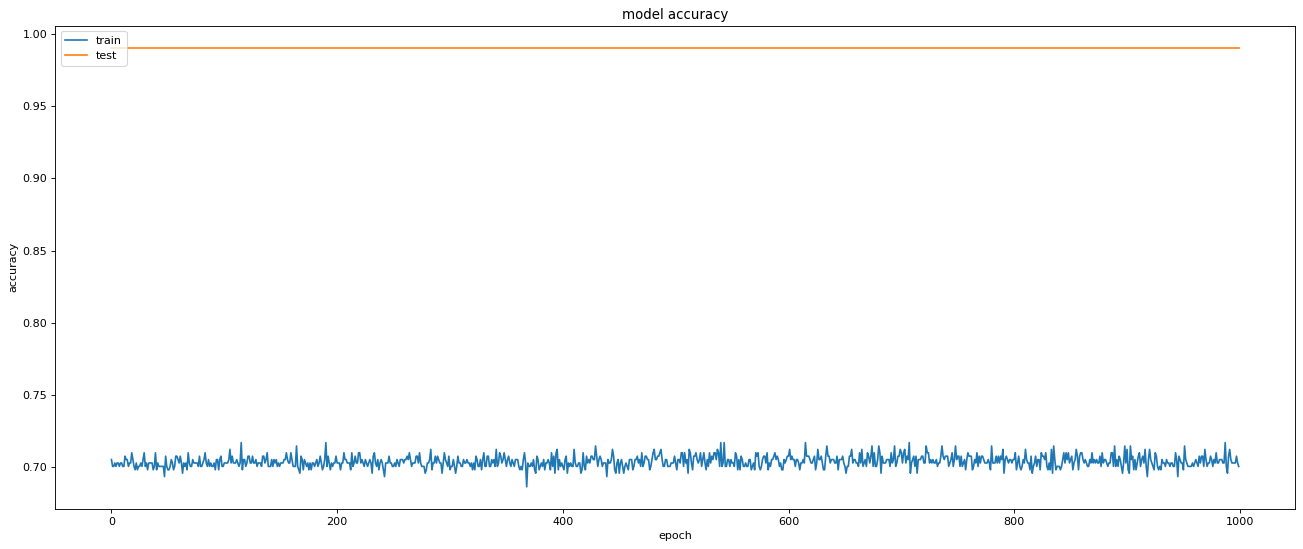

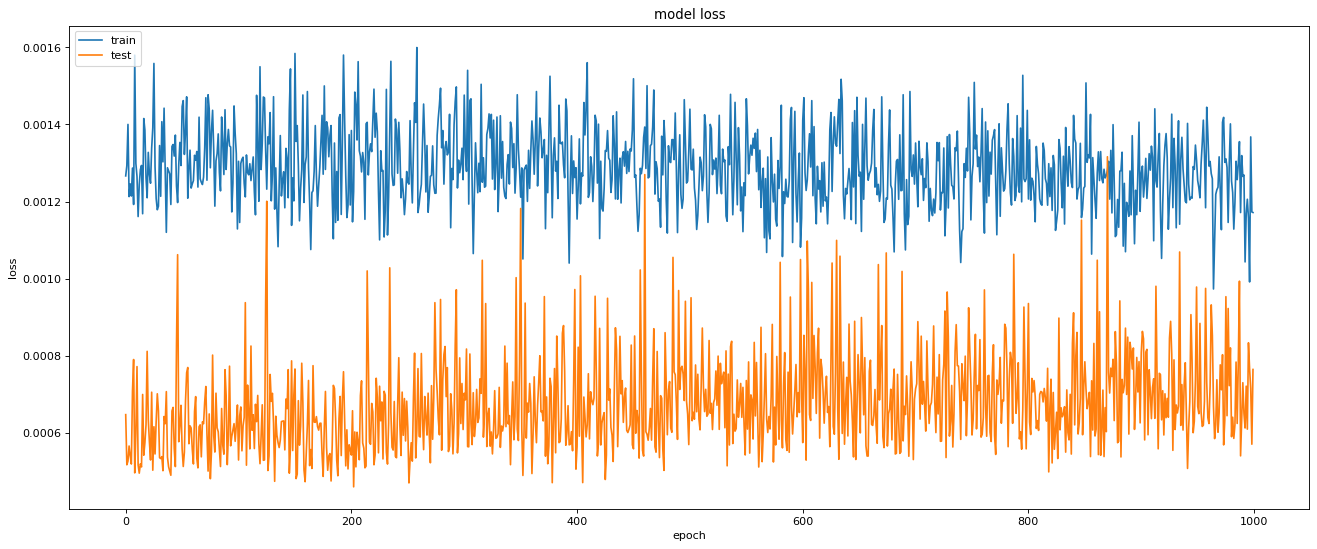

In [20]:
# list all data in history
print(history_Mn.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history_Mn.history['accuracy'])
plt.plot(history_Mn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history_Mn.history['loss'])
plt.plot(history_Mn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =12 wk = 1Q    output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict Wk ================
n_node=72    # node unit     Mn Wk D
D_O=0.33         # Drop Out   Mn Wk D
ep_All=1000            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Wk.shape[1]
n_features_input = X_train_Wk.shape[2]
n_step_out =  Y_train_Wk.shape[1]
n_features_output = Y_train_Wk.shape[1]

model_Wk = Sequential()
model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input)))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='sigmoid', return_sequences=False))
model_Wk.add(Dropout(D_O))

model_Wk.add(Dense(n_features_output))

model_Wk.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_Wk = "model_OHLC_Wk.h5"
checkpoint = ModelCheckpoint(filepath_Wk, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_Wk = model_Wk.fit(X_train_Wk, Y_train_Wk, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('\n', '....................................... End Wk .....................................................')

print('time model_All = ', time_2 - time_1)

Z_Wk=model_Wk.predict(X_predict_Wk)
print(Z_Wk)

Train on 2004 samples, validate on 354 samples
Epoch 1/1000
2004/2004 [==============================] - 3s 1ms/step - loss: 0.4174 - accuracy: 0.3588 - val_loss: 0.0095 - val_accuracy: 0.9887

Epoch 00001: loss improved from inf to 0.41743, saving model to model_OHLC_Wk.h5
Epoch 2/1000
2004/2004 [==============================] - 2s 880us/step - loss: 0.1422 - accuracy: 0.2690 - val_loss: 0.0051 - val_accuracy: 0.0000e+00

Epoch 00002: loss improved from 0.41743 to 0.14217, saving model to model_OHLC_Wk.h5
Epoch 3/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0971 - accuracy: 0.2745 - val_loss: 0.0025 - val_accuracy: 0.9887

Epoch 00003: loss improved from 0.14217 to 0.09713, saving model to model_OHLC_Wk.h5
Epoch 4/1000
2004/2004 [==============================] - 2s 877us/step - loss: 0.0815 - accuracy: 0.2535 - val_loss: 0.0039 - val_accuracy: 0.0113

Epoch 00004: loss improved from 0.09713 to 0.08149, saving model to model_OHLC_Wk.h5
Epoch 5/1000
2004/200

2004/2004 [==============================] - 2s 1ms/step - loss: 0.0173 - accuracy: 0.2819 - val_loss: 0.0038 - val_accuracy: 0.9887

Epoch 00037: loss improved from 0.01861 to 0.01728, saving model to model_OHLC_Wk.h5
Epoch 38/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0176 - accuracy: 0.2799 - val_loss: 0.0013 - val_accuracy: 0.8729

Epoch 00038: loss did not improve from 0.01728
Epoch 39/1000
2004/2004 [==============================] - 2s 985us/step - loss: 0.0183 - accuracy: 0.2759 - val_loss: 0.0074 - val_accuracy: 0.9887

Epoch 00039: loss did not improve from 0.01728
Epoch 40/1000
2004/2004 [==============================] - 2s 818us/step - loss: 0.0173 - accuracy: 0.2849 - val_loss: 0.0011 - val_accuracy: 0.9887

Epoch 00040: loss did not improve from 0.01728
Epoch 41/1000
2004/2004 [==============================] - 2s 790us/step - loss: 0.0155 - accuracy: 0.2969 - val_loss: 0.0059 - val_accuracy: 0.9887

Epoch 00041: loss improved from 0.01728 to

2004/2004 [==============================] - 2s 871us/step - loss: 0.0080 - accuracy: 0.3797 - val_loss: 0.0012 - val_accuracy: 0.9887

Epoch 00075: loss improved from 0.00818 to 0.00803, saving model to model_OHLC_Wk.h5
Epoch 76/1000
2004/2004 [==============================] - 2s 924us/step - loss: 0.0081 - accuracy: 0.3653 - val_loss: 7.7307e-04 - val_accuracy: 0.9887

Epoch 00076: loss did not improve from 0.00803
Epoch 77/1000
2004/2004 [==============================] - 2s 968us/step - loss: 0.0076 - accuracy: 0.3593 - val_loss: 9.8137e-04 - val_accuracy: 0.9887

Epoch 00077: loss improved from 0.00803 to 0.00758, saving model to model_OHLC_Wk.h5
Epoch 78/1000
2004/2004 [==============================] - 2s 979us/step - loss: 0.0077 - accuracy: 0.3513 - val_loss: 9.7282e-04 - val_accuracy: 0.9887

Epoch 00078: loss did not improve from 0.00758
Epoch 79/1000
2004/2004 [==============================] - 2s 993us/step - loss: 0.0071 - accuracy: 0.3653 - val_loss: 0.0022 - val_accura


Epoch 00112: loss did not improve from 0.00424
Epoch 113/1000
2004/2004 [==============================] - 2s 945us/step - loss: 0.0049 - accuracy: 0.5504 - val_loss: 0.0010 - val_accuracy: 0.9887

Epoch 00113: loss did not improve from 0.00424
Epoch 114/1000
2004/2004 [==============================] - 2s 979us/step - loss: 0.0046 - accuracy: 0.5604 - val_loss: 0.0014 - val_accuracy: 0.9887

Epoch 00114: loss did not improve from 0.00424
Epoch 115/1000
2004/2004 [==============================] - 2s 924us/step - loss: 0.0047 - accuracy: 0.5364 - val_loss: 8.3020e-04 - val_accuracy: 0.9887

Epoch 00115: loss did not improve from 0.00424
Epoch 116/1000
2004/2004 [==============================] - 2s 890us/step - loss: 0.0043 - accuracy: 0.5424 - val_loss: 0.0020 - val_accuracy: 0.9887

Epoch 00116: loss did not improve from 0.00424
Epoch 117/1000
2004/2004 [==============================] - 2s 911us/step - loss: 0.0044 - accuracy: 0.5284 - val_loss: 0.0010 - val_accuracy: 0.9887

Epoch


Epoch 00191: loss did not improve from 0.00288
Epoch 192/1000
2004/2004 [==============================] - 2s 769us/step - loss: 0.0030 - accuracy: 0.6871 - val_loss: 0.0024 - val_accuracy: 0.9887

Epoch 00192: loss did not improve from 0.00288
Epoch 193/1000
2004/2004 [==============================] - 2s 832us/step - loss: 0.0029 - accuracy: 0.6841 - val_loss: 0.0024 - val_accuracy: 0.9887

Epoch 00193: loss improved from 0.00288 to 0.00285, saving model to model_OHLC_Wk.h5
Epoch 194/1000
2004/2004 [==============================] - 2s 928us/step - loss: 0.0030 - accuracy: 0.6826 - val_loss: 0.0057 - val_accuracy: 0.9887

Epoch 00194: loss did not improve from 0.00285
Epoch 195/1000
2004/2004 [==============================] - 2s 986us/step - loss: 0.0030 - accuracy: 0.6796 - val_loss: 0.0028 - val_accuracy: 0.9887

Epoch 00195: loss did not improve from 0.00285
Epoch 196/1000
2004/2004 [==============================] - 2s 988us/step - loss: 0.0028 - accuracy: 0.6761 - val_loss: 0.


Epoch 00231: loss did not improve from 0.00242
Epoch 232/1000
2004/2004 [==============================] - 2s 971us/step - loss: 0.0022 - accuracy: 0.6846 - val_loss: 0.0080 - val_accuracy: 0.9887

Epoch 00232: loss improved from 0.00242 to 0.00224, saving model to model_OHLC_Wk.h5
Epoch 233/1000
2004/2004 [==============================] - 2s 835us/step - loss: 0.0024 - accuracy: 0.6786 - val_loss: 0.0076 - val_accuracy: 0.9887

Epoch 00233: loss did not improve from 0.00224
Epoch 234/1000
2004/2004 [==============================] - 2s 777us/step - loss: 0.0023 - accuracy: 0.6786 - val_loss: 0.0032 - val_accuracy: 0.9887

Epoch 00234: loss did not improve from 0.00224
Epoch 235/1000
2004/2004 [==============================] - 2s 763us/step - loss: 0.0025 - accuracy: 0.6796 - val_loss: 0.0041 - val_accuracy: 0.9887

Epoch 00235: loss did not improve from 0.00224
Epoch 236/1000
2004/2004 [==============================] - 2s 859us/step - loss: 0.0025 - accuracy: 0.6851 - val_loss: 0.


Epoch 00271: loss did not improve from 0.00186
Epoch 272/1000
2004/2004 [==============================] - 2s 974us/step - loss: 0.0019 - accuracy: 0.7091 - val_loss: 0.0075 - val_accuracy: 0.9887

Epoch 00272: loss did not improve from 0.00186
Epoch 273/1000
2004/2004 [==============================] - 2s 901us/step - loss: 0.0019 - accuracy: 0.7081 - val_loss: 0.0069 - val_accuracy: 0.9887

Epoch 00273: loss did not improve from 0.00186
Epoch 274/1000
2004/2004 [==============================] - 2s 996us/step - loss: 0.0019 - accuracy: 0.7066 - val_loss: 0.0063 - val_accuracy: 0.9887

Epoch 00274: loss did not improve from 0.00186
Epoch 275/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.7051 - val_loss: 0.0087 - val_accuracy: 0.9887

Epoch 00275: loss did not improve from 0.00186
Epoch 276/1000
2004/2004 [==============================] - 2s 885us/step - loss: 0.0017 - accuracy: 0.7071 - val_loss: 0.0071 - val_accuracy: 0.9887

Epoch 00276

2004/2004 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.7181 - val_loss: 0.0120 - val_accuracy: 0.9887

Epoch 00312: loss did not improve from 0.00155
Epoch 313/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.7201 - val_loss: 0.0108 - val_accuracy: 0.9887

Epoch 00313: loss did not improve from 0.00155
Epoch 314/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 0.7116 - val_loss: 0.0099 - val_accuracy: 0.9887

Epoch 00314: loss did not improve from 0.00155
Epoch 315/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.7166 - val_loss: 0.0136 - val_accuracy: 0.9887

Epoch 00315: loss did not improve from 0.00155
Epoch 316/1000
2004/2004 [==============================] - 2s 983us/step - loss: 0.0016 - accuracy: 0.7121 - val_loss: 0.0104 - val_accuracy: 0.9887

Epoch 00316: loss did not improve from 0.00155
Epoch 317/1000
2004/2004 [=======

Epoch 352/1000
2004/2004 [==============================] - 2s 972us/step - loss: 0.0014 - accuracy: 0.7066 - val_loss: 0.0134 - val_accuracy: 0.9887

Epoch 00352: loss did not improve from 0.00121
Epoch 353/1000
2004/2004 [==============================] - 2s 992us/step - loss: 0.0014 - accuracy: 0.7021 - val_loss: 0.0131 - val_accuracy: 0.9887

Epoch 00353: loss did not improve from 0.00121
Epoch 354/1000
2004/2004 [==============================] - 1s 742us/step - loss: 0.0013 - accuracy: 0.7041 - val_loss: 0.0145 - val_accuracy: 0.9887

Epoch 00354: loss did not improve from 0.00121
Epoch 355/1000
2004/2004 [==============================] - 1s 731us/step - loss: 0.0014 - accuracy: 0.7026 - val_loss: 0.0108 - val_accuracy: 0.9887

Epoch 00355: loss did not improve from 0.00121
Epoch 356/1000
2004/2004 [==============================] - 2s 785us/step - loss: 0.0014 - accuracy: 0.7021 - val_loss: 0.0180 - val_accuracy: 0.9887

Epoch 00356: loss did not improve from 0.00121
Epoch 357/

2004/2004 [==============================] - 2s 925us/step - loss: 0.0011 - accuracy: 0.7046 - val_loss: 0.0166 - val_accuracy: 0.9887

Epoch 00433: loss did not improve from 0.00108
Epoch 434/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 0.7051 - val_loss: 0.0173 - val_accuracy: 0.9887

Epoch 00434: loss did not improve from 0.00108
Epoch 435/1000
2004/2004 [==============================] - 2s 962us/step - loss: 0.0011 - accuracy: 0.7016 - val_loss: 0.0166 - val_accuracy: 0.9887

Epoch 00435: loss did not improve from 0.00108
Epoch 436/1000
2004/2004 [==============================] - 2s 950us/step - loss: 0.0011 - accuracy: 0.7051 - val_loss: 0.0177 - val_accuracy: 0.9887

Epoch 00436: loss did not improve from 0.00108
Epoch 437/1000
2004/2004 [==============================] - 2s 927us/step - loss: 0.0013 - accuracy: 0.7066 - val_loss: 0.0169 - val_accuracy: 0.9887

Epoch 00437: loss did not improve from 0.00108
Epoch 438/1000
2004/2004 [=

2004/2004 [==============================] - 2s 943us/step - loss: 0.0012 - accuracy: 0.7076 - val_loss: 0.0198 - val_accuracy: 0.9887

Epoch 00474: loss did not improve from 0.00099
Epoch 475/1000
2004/2004 [==============================] - 2s 921us/step - loss: 0.0010 - accuracy: 0.7041 - val_loss: 0.0164 - val_accuracy: 0.9887

Epoch 00475: loss did not improve from 0.00099
Epoch 476/1000
2004/2004 [==============================] - 2s 909us/step - loss: 0.0011 - accuracy: 0.7036 - val_loss: 0.0276 - val_accuracy: 0.9887

Epoch 00476: loss did not improve from 0.00099
Epoch 477/1000
2004/2004 [==============================] - 2s 923us/step - loss: 0.0013 - accuracy: 0.7106 - val_loss: 0.0184 - val_accuracy: 0.9887

Epoch 00477: loss did not improve from 0.00099
Epoch 478/1000
2004/2004 [==============================] - 2s 938us/step - loss: 0.0011 - accuracy: 0.7066 - val_loss: 0.0182 - val_accuracy: 0.9887

Epoch 00478: loss did not improve from 0.00099
Epoch 479/1000
2004/2004 

2004/2004 [==============================] - 2s 961us/step - loss: 0.0011 - accuracy: 0.7136 - val_loss: 0.0147 - val_accuracy: 0.9887

Epoch 00555: loss did not improve from 0.00093
Epoch 556/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 0.0010 - accuracy: 0.7081 - val_loss: 0.0178 - val_accuracy: 0.9887

Epoch 00556: loss did not improve from 0.00093
Epoch 557/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 9.4049e-04 - accuracy: 0.7056 - val_loss: 0.0192 - val_accuracy: 0.9887

Epoch 00557: loss did not improve from 0.00093
Epoch 558/1000
2004/2004 [==============================] - 2s 985us/step - loss: 9.8646e-04 - accuracy: 0.7051 - val_loss: 0.0173 - val_accuracy: 0.9887

Epoch 00558: loss did not improve from 0.00093
Epoch 559/1000
2004/2004 [==============================] - 2s 915us/step - loss: 9.8656e-04 - accuracy: 0.7071 - val_loss: 0.0163 - val_accuracy: 0.9887

Epoch 00559: loss did not improve from 0.00093
Epoch 560/1000
20


Epoch 00595: loss did not improve from 0.00090
Epoch 596/1000
2004/2004 [==============================] - 2s 856us/step - loss: 0.0011 - accuracy: 0.7106 - val_loss: 0.0211 - val_accuracy: 0.9887

Epoch 00596: loss did not improve from 0.00090
Epoch 597/1000
2004/2004 [==============================] - 2s 880us/step - loss: 9.4810e-04 - accuracy: 0.7026 - val_loss: 0.0225 - val_accuracy: 0.9887

Epoch 00597: loss did not improve from 0.00090
Epoch 598/1000
2004/2004 [==============================] - 2s 948us/step - loss: 9.9196e-04 - accuracy: 0.7076 - val_loss: 0.0191 - val_accuracy: 0.9887

Epoch 00598: loss did not improve from 0.00090
Epoch 599/1000
2004/2004 [==============================] - 2s 942us/step - loss: 0.0010 - accuracy: 0.7026 - val_loss: 0.0196 - val_accuracy: 0.9887

Epoch 00599: loss did not improve from 0.00090
Epoch 600/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 9.8959e-04 - accuracy: 0.7076 - val_loss: 0.0193 - val_accuracy: 0.9887



Epoch 00636: loss did not improve from 0.00090
Epoch 637/1000
2004/2004 [==============================] - 2s 925us/step - loss: 9.9036e-04 - accuracy: 0.7021 - val_loss: 0.0183 - val_accuracy: 0.9887

Epoch 00637: loss did not improve from 0.00090
Epoch 638/1000
2004/2004 [==============================] - 2s 932us/step - loss: 9.4505e-04 - accuracy: 0.7041 - val_loss: 0.0198 - val_accuracy: 0.9887

Epoch 00638: loss did not improve from 0.00090
Epoch 639/1000
2004/2004 [==============================] - 2s 885us/step - loss: 9.1690e-04 - accuracy: 0.7096 - val_loss: 0.0200 - val_accuracy: 0.9887

Epoch 00639: loss did not improve from 0.00090
Epoch 640/1000
2004/2004 [==============================] - 2s 912us/step - loss: 9.2929e-04 - accuracy: 0.7021 - val_loss: 0.0216 - val_accuracy: 0.9887

Epoch 00640: loss did not improve from 0.00090
Epoch 641/1000
2004/2004 [==============================] - 2s 922us/step - loss: 9.2833e-04 - accuracy: 0.7046 - val_loss: 0.0207 - val_accurac

2004/2004 [==============================] - 2s 857us/step - loss: 0.0011 - accuracy: 0.7111 - val_loss: 0.0179 - val_accuracy: 0.9887

Epoch 00718: loss did not improve from 0.00086
Epoch 719/1000
2004/2004 [==============================] - 2s 821us/step - loss: 8.9563e-04 - accuracy: 0.7046 - val_loss: 0.0183 - val_accuracy: 0.9887

Epoch 00719: loss did not improve from 0.00086
Epoch 720/1000
2004/2004 [==============================] - 2s 881us/step - loss: 9.0189e-04 - accuracy: 0.7086 - val_loss: 0.0159 - val_accuracy: 0.9887

Epoch 00720: loss did not improve from 0.00086
Epoch 721/1000
2004/2004 [==============================] - 2s 830us/step - loss: 0.0010 - accuracy: 0.7046 - val_loss: 0.0160 - val_accuracy: 0.9887

Epoch 00721: loss did not improve from 0.00086
Epoch 722/1000
2004/2004 [==============================] - 2s 852us/step - loss: 8.9874e-04 - accuracy: 0.7076 - val_loss: 0.0221 - val_accuracy: 0.9887

Epoch 00722: loss did not improve from 0.00086
Epoch 723/100

2004/2004 [==============================] - 1s 689us/step - loss: 0.0010 - accuracy: 0.7031 - val_loss: 0.0199 - val_accuracy: 0.9887

Epoch 00759: loss did not improve from 0.00086
Epoch 760/1000
2004/2004 [==============================] - 2s 765us/step - loss: 9.2368e-04 - accuracy: 0.7046 - val_loss: 0.0192 - val_accuracy: 0.9887

Epoch 00760: loss did not improve from 0.00086
Epoch 761/1000
2004/2004 [==============================] - 2s 769us/step - loss: 0.0010 - accuracy: 0.7096 - val_loss: 0.0200 - val_accuracy: 0.9887

Epoch 00761: loss did not improve from 0.00086
Epoch 762/1000
2004/2004 [==============================] - 2s 991us/step - loss: 0.0010 - accuracy: 0.7051 - val_loss: 0.0200 - val_accuracy: 0.9887

Epoch 00762: loss did not improve from 0.00086
Epoch 763/1000
2004/2004 [==============================] - 2s 934us/step - loss: 9.1541e-04 - accuracy: 0.7071 - val_loss: 0.0187 - val_accuracy: 0.9887

Epoch 00763: loss did not improve from 0.00086
Epoch 764/1000
20


Epoch 00799: loss did not improve from 0.00086
Epoch 800/1000
2004/2004 [==============================] - 1s 699us/step - loss: 9.5560e-04 - accuracy: 0.7111 - val_loss: 0.0188 - val_accuracy: 0.9887

Epoch 00800: loss did not improve from 0.00086
Epoch 801/1000
2004/2004 [==============================] - 1s 722us/step - loss: 8.8501e-04 - accuracy: 0.7056 - val_loss: 0.0194 - val_accuracy: 0.9887

Epoch 00801: loss did not improve from 0.00086
Epoch 802/1000
2004/2004 [==============================] - 1s 706us/step - loss: 9.1838e-04 - accuracy: 0.7036 - val_loss: 0.0171 - val_accuracy: 0.9887

Epoch 00802: loss did not improve from 0.00086
Epoch 803/1000
2004/2004 [==============================] - 2s 818us/step - loss: 9.0894e-04 - accuracy: 0.7071 - val_loss: 0.0182 - val_accuracy: 0.9887

Epoch 00803: loss did not improve from 0.00086
Epoch 804/1000
2004/2004 [==============================] - 2s 925us/step - loss: 9.3587e-04 - accuracy: 0.7101 - val_loss: 0.0165 - val_accurac

2004/2004 [==============================] - 2s 936us/step - loss: 9.2425e-04 - accuracy: 0.7036 - val_loss: 0.0199 - val_accuracy: 0.9887

Epoch 00880: loss did not improve from 0.00080
Epoch 881/1000
2004/2004 [==============================] - 2s 917us/step - loss: 9.6889e-04 - accuracy: 0.7066 - val_loss: 0.0196 - val_accuracy: 0.9887

Epoch 00881: loss did not improve from 0.00080
Epoch 882/1000
2004/2004 [==============================] - 2s 949us/step - loss: 9.0123e-04 - accuracy: 0.7046 - val_loss: 0.0205 - val_accuracy: 0.9887

Epoch 00882: loss did not improve from 0.00080
Epoch 883/1000
2004/2004 [==============================] - 2s 898us/step - loss: 0.0010 - accuracy: 0.6926 - val_loss: 0.0197 - val_accuracy: 0.9887

Epoch 00883: loss did not improve from 0.00080
Epoch 884/1000
2004/2004 [==============================] - 2s 762us/step - loss: 9.3457e-04 - accuracy: 0.7036 - val_loss: 0.0176 - val_accuracy: 0.9887

Epoch 00884: loss did not improve from 0.00080
Epoch 885


Epoch 00920: loss did not improve from 0.00080
Epoch 921/1000
2004/2004 [==============================] - 2s 875us/step - loss: 9.4511e-04 - accuracy: 0.7036 - val_loss: 0.0163 - val_accuracy: 0.9887

Epoch 00921: loss did not improve from 0.00080
Epoch 922/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 9.3883e-04 - accuracy: 0.7071 - val_loss: 0.0174 - val_accuracy: 0.9887

Epoch 00922: loss did not improve from 0.00080
Epoch 923/1000
2004/2004 [==============================] - 2s 1ms/step - loss: 9.4338e-04 - accuracy: 0.7066 - val_loss: 0.0198 - val_accuracy: 0.9887

Epoch 00923: loss did not improve from 0.00080
Epoch 924/1000
2004/2004 [==============================] - 2s 921us/step - loss: 9.6434e-04 - accuracy: 0.7071 - val_loss: 0.0176 - val_accuracy: 0.9887

Epoch 00924: loss did not improve from 0.00080
Epoch 925/1000
2004/2004 [==============================] - 2s 965us/step - loss: 9.1176e-04 - accuracy: 0.7086 - val_loss: 0.0192 - val_accuracy: 0

In [25]:
# ------------------------load the model--------------------------
filepath_Wk = "model_OHLC_Wk.h5"
re_model_Wk = load_model(filepath_Wk)

# fit the model
checkpoint = ModelCheckpoint(filepath_Wk, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history_Wk = re_model_Wk.fit(X_train_Wk, Y_train_Wk, validation_split=0.15, epochs=10, batch_size=50, callbacks=callbacks_list)

Train on 2004 samples, validate on 354 samples
Epoch 1/10
2004/2004 [==============================] - 3s 1ms/step - loss: 9.4561e-04 - accuracy: 0.7076 - val_loss: 0.0145 - val_accuracy: 0.9887

Epoch 00001: loss improved from inf to 0.00095, saving model to model_OHLC_Wk.h5
Epoch 2/10
2004/2004 [==============================] - 1s 723us/step - loss: 9.6613e-04 - accuracy: 0.7086 - val_loss: 0.0165 - val_accuracy: 0.9887

Epoch 00002: loss did not improve from 0.00095
Epoch 3/10
2004/2004 [==============================] - 2s 758us/step - loss: 9.1526e-04 - accuracy: 0.7096 - val_loss: 0.0173 - val_accuracy: 0.9887

Epoch 00003: loss improved from 0.00095 to 0.00092, saving model to model_OHLC_Wk.h5
Epoch 4/10
2004/2004 [==============================] - 1s 737us/step - loss: 9.0556e-04 - accuracy: 0.7016 - val_loss: 0.0208 - val_accuracy: 0.9887

Epoch 00004: loss improved from 0.00092 to 0.00091, saving model to model_OHLC_Wk.h5
Epoch 5/10
2004/2004 [==============================]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


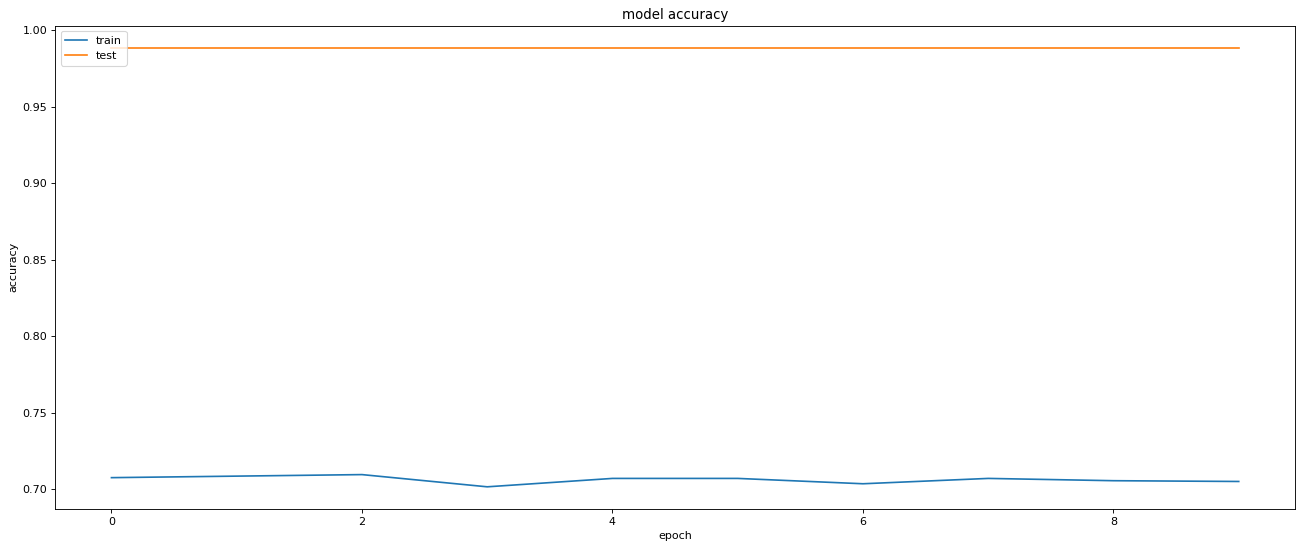

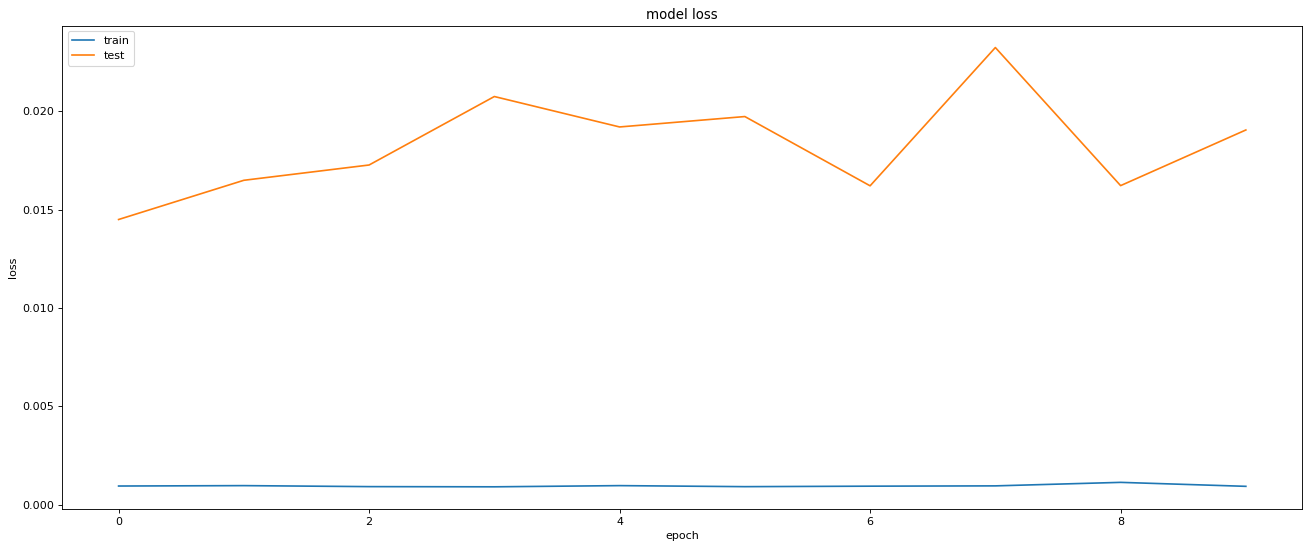

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 72)            22176     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 72)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 72)            41760     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 72)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 72)                41760     
_________________________________________________________________
dropout_3 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                

In [26]:
# list all data in history
print(history_Wk.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history_Wk.history['accuracy'])
plt.plot(history_Wk.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history_Wk.history['loss'])
plt.plot(history_Wk.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_Wk.summary()

In [31]:
# -------------------------------------- Data -------------------------------
#        input  [ [ ohlc ],      n_step =20 D = 1 Mn     output   [ [ ohlc ]]
#                   [ ohlc ],
#                   [ ohlc ],
#                   [ ohlc ] ]
#============ Model LSTM  predict D ================
n_node=120    # node unit     Mn Wk D
D_O=0.33         # Drop Out   Mn Wk D
ep_All=10           #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_D.shape[1]
n_features_input = X_train_D.shape[2]
n_step_out =  Y_train_D.shape[1]
n_features_output = Y_train_D.shape[1]

model_D = Sequential()
model_D.add(LSTM(n_node, activation='relu', return_sequences=True, input_shape=(n_step_in, n_features_input)))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=True))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=False))
model_D.add(Dropout(D_O))

model_D.add(Dense(n_features_output))

model_D.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_D = "model_OHLC_D.h5"
checkpoint = ModelCheckpoint(filepath_D, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history_D = model_D.fit(X_train_D, Y_train_D, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('....................................... End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

Z_D=model_D.predict(X_predict_D)
print(Z_D)

model_D.summary()

Train on 8910 samples, validate on 1573 samples
Epoch 1/10
8910/8910 [==============================] - 12s 1ms/step - loss: 0.0861 - accuracy: 0.2774 - val_loss: 0.0129 - val_accuracy: 0.0051

Epoch 00001: loss improved from inf to 0.08605, saving model to model_OHLC_D.h5
Epoch 2/10
8910/8910 [==============================] - 12s 1ms/step - loss: 0.0241 - accuracy: 0.2690 - val_loss: 0.0094 - val_accuracy: 0.9949

Epoch 00002: loss improved from 0.08605 to 0.02413, saving model to model_OHLC_D.h5
Epoch 3/10
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0191 - accuracy: 0.2697 - val_loss: 0.0165 - val_accuracy: 0.9949

Epoch 00003: loss improved from 0.02413 to 0.01911, saving model to model_OHLC_D.h5
Epoch 4/10
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0165 - accuracy: 0.2746 - val_loss: 0.0313 - val_accuracy: 0.0324

Epoch 00004: loss improved from 0.01911 to 0.01647, saving model to model_OHLC_D.h5
Epoch 5/10
8910/8910 [==============

In [32]:
# ------------------------load the model--------------------------
filepath_D = 'model_OHLC_D.h5'
re_model_D = load_model(filepath_D)

# fit the model
checkpoint = ModelCheckpoint(filepath_D, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list =[checkpoint]

history_D = re_model_D.fit(X_train_D, Y_train_D, validation_split=0.15, epochs=1000, batch_size=50, callbacks=callbacks_list)

Z_D=re_model_D.predict(X_predict_D)
print(Z_D)

Train on 8910 samples, validate on 1573 samples
Epoch 1/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 0.0083 - accuracy: 0.3228 - val_loss: 0.0389 - val_accuracy: 0.0051

Epoch 00001: loss improved from inf to 0.00830, saving model to model_OHLC_D.h5
Epoch 2/1000
8910/8910 [==============================] - 11s 1ms/step - loss: 0.0079 - accuracy: 0.3438 - val_loss: 0.0312 - val_accuracy: 0.9949

Epoch 00002: loss improved from 0.00830 to 0.00792, saving model to model_OHLC_D.h5
Epoch 3/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0072 - accuracy: 0.3650 - val_loss: 0.0269 - val_accuracy: 0.9949

Epoch 00003: loss improved from 0.00792 to 0.00724, saving model to model_OHLC_D.h5
Epoch 4/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0070 - accuracy: 0.3786 - val_loss: 0.0485 - val_accuracy: 0.9949

Epoch 00004: loss improved from 0.00724 to 0.00698, saving model to model_OHLC_D.h5
Epoch 5/1000
8910/8910 [====

8910/8910 [==============================] - 13s 1ms/step - loss: 0.0018 - accuracy: 0.7983 - val_loss: 0.0318 - val_accuracy: 0.9949

Epoch 00078: loss did not improve from 0.00174
Epoch 79/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0018 - accuracy: 0.7983 - val_loss: 0.0328 - val_accuracy: 0.9949

Epoch 00079: loss did not improve from 0.00174
Epoch 80/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0018 - accuracy: 0.7983 - val_loss: 0.0330 - val_accuracy: 0.9949

Epoch 00080: loss did not improve from 0.00174
Epoch 81/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 0.0018 - accuracy: 0.7983 - val_loss: 0.0328 - val_accuracy: 0.9949 0s - loss: 0.0018 

Epoch 00081: loss did not improve from 0.00174
Epoch 82/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 0.0018 - accuracy: 0.7983 - val_loss: 0.0367 - val_accuracy: 0.9949

Epoch 00082: loss did not improve from 0.00174
Epoch 83/1000
8

8910/8910 [==============================] - 12s 1ms/step - loss: 8.9447e-04 - accuracy: 0.7989 - val_loss: 0.0263 - val_accuracy: 0.9949

Epoch 00157: loss did not improve from 0.00087
Epoch 158/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.7578e-04 - accuracy: 0.8000 - val_loss: 0.0314 - val_accuracy: 0.9949

Epoch 00158: loss did not improve from 0.00087
Epoch 159/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.6967e-04 - accuracy: 0.7985 - val_loss: 0.0266 - val_accuracy: 0.9949

Epoch 00159: loss improved from 0.00087 to 0.00087, saving model to model_OHLC_D.h5
Epoch 160/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 9.1238e-04 - accuracy: 0.7990 - val_loss: 0.0272 - val_accuracy: 0.9949

Epoch 00160: loss did not improve from 0.00087
Epoch 161/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.4877e-04 - accuracy: 0.7991 - val_loss: 0.0246 - val_accuracy: 0.9949

Epoch 00161: loss im


Epoch 00196: loss did not improve from 0.00081
Epoch 197/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.2294e-04 - accuracy: 0.8001 - val_loss: 0.0280 - val_accuracy: 0.9949

Epoch 00197: loss did not improve from 0.00081
Epoch 198/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.1349e-04 - accuracy: 0.7996 - val_loss: 0.0286 - val_accuracy: 0.9949

Epoch 00198: loss did not improve from 0.00081
Epoch 199/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.3222e-04 - accuracy: 0.7988 - val_loss: 0.0262 - val_accuracy: 0.9949

Epoch 00199: loss did not improve from 0.00081
Epoch 200/1000
8910/8910 [==============================] - 11s 1ms/step - loss: 8.5423e-04 - accuracy: 0.7987 - val_loss: 0.0265 - val_accuracy: 0.9949

Epoch 00200: loss did not improve from 0.00081
Epoch 201/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 8.3849e-04 - accuracy: 0.7991 - val_loss: 0.0218 - val_accuracy: 0.

8910/8910 [==============================] - 12s 1ms/step - loss: 8.1881e-04 - accuracy: 0.8000 - val_loss: 0.0293 - val_accuracy: 0.9949

Epoch 00237: loss did not improve from 0.00080
Epoch 238/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.0548e-04 - accuracy: 0.8006 - val_loss: 0.0273 - val_accuracy: 0.9949

Epoch 00238: loss did not improve from 0.00080
Epoch 239/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.1347e-04 - accuracy: 0.7985 - val_loss: 0.0262 - val_accuracy: 0.9949

Epoch 00239: loss did not improve from 0.00080
Epoch 240/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.0455e-04 - accuracy: 0.7997 - val_loss: 0.0293 - val_accuracy: 0.9949

Epoch 00240: loss did not improve from 0.00080
Epoch 241/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.8256e-04 - accuracy: 0.7987 - val_loss: 0.0291 - val_accuracy: 0.9949

Epoch 00241: loss improved from 0.00080 to 0.00078, savin

8910/8910 [==============================] - 14s 2ms/step - loss: 8.1149e-04 - accuracy: 0.7985 - val_loss: 0.0249 - val_accuracy: 0.9949

Epoch 00317: loss did not improve from 0.00076
Epoch 318/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.9006e-04 - accuracy: 0.8000 - val_loss: 0.0261 - val_accuracy: 0.9949

Epoch 00318: loss did not improve from 0.00076
Epoch 319/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.9089e-04 - accuracy: 0.7984 - val_loss: 0.0255 - val_accuracy: 0.9949

Epoch 00319: loss did not improve from 0.00076
Epoch 320/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.8178e-04 - accuracy: 0.8003 - val_loss: 0.0248 - val_accuracy: 0.9949

Epoch 00320: loss did not improve from 0.00076
Epoch 321/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.1711e-04 - accuracy: 0.7996 - val_loss: 0.0256 - val_accuracy: 0.9949

Epoch 00321: loss did not improve from 0.00076
Epoch 322/

8910/8910 [==============================] - 13s 1ms/step - loss: 8.4824e-04 - accuracy: 0.7998 - val_loss: 0.0285 - val_accuracy: 0.9949

Epoch 00358: loss did not improve from 0.00076
Epoch 359/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.8147e-04 - accuracy: 0.8000 - val_loss: 0.0273 - val_accuracy: 0.9949

Epoch 00359: loss did not improve from 0.00076
Epoch 360/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.8430e-04 - accuracy: 0.7990 - val_loss: 0.0289 - val_accuracy: 0.9949

Epoch 00360: loss did not improve from 0.00076
Epoch 361/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 7.9366e-04 - accuracy: 0.8000 - val_loss: 0.0314 - val_accuracy: 0.9949

Epoch 00361: loss did not improve from 0.00076
Epoch 362/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 8.0919e-04 - accuracy: 0.7987 - val_loss: 0.0230 - val_accuracy: 0.9949

Epoch 00362: loss did not improve from 0.00076
Epoch 363/


Epoch 00398: loss did not improve from 0.00075
Epoch 399/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.8098e-04 - accuracy: 0.8017 - val_loss: 0.0292 - val_accuracy: 0.9949

Epoch 00399: loss did not improve from 0.00075
Epoch 400/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.5320e-04 - accuracy: 0.8003 - val_loss: 0.0250 - val_accuracy: 0.9949

Epoch 00400: loss did not improve from 0.00075
Epoch 401/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 8.0614e-04 - accuracy: 0.7999 - val_loss: 0.0284 - val_accuracy: 0.9949

Epoch 00401: loss did not improve from 0.00075
Epoch 402/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.8415e-04 - accuracy: 0.8003 - val_loss: 0.0265 - val_accuracy: 0.9949

Epoch 00402: loss did not improve from 0.00075
Epoch 403/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.3569e-04 - accuracy: 0.7998 - val_loss: 0.0256 - val_accuracy: 0.

8910/8910 [==============================] - 14s 2ms/step - loss: 7.7247e-04 - accuracy: 0.7998 - val_loss: 0.0256 - val_accuracy: 0.9949

Epoch 00439: loss did not improve from 0.00073
Epoch 440/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.8376e-04 - accuracy: 0.7987 - val_loss: 0.0247 - val_accuracy: 0.9949

Epoch 00440: loss did not improve from 0.00073
Epoch 441/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.9201e-04 - accuracy: 0.7996 - val_loss: 0.0251 - val_accuracy: 0.9949

Epoch 00441: loss did not improve from 0.00073
Epoch 442/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.5700e-04 - accuracy: 0.7989 - val_loss: 0.0263 - val_accuracy: 0.9949

Epoch 00442: loss did not improve from 0.00073
Epoch 443/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6495e-04 - accuracy: 0.7991 - val_loss: 0.0270 - val_accuracy: 0.9949

Epoch 00443: loss did not improve from 0.00073
Epoch 444/

8910/8910 [==============================] - 14s 2ms/step - loss: 7.7151e-04 - accuracy: 0.7994 - val_loss: 0.0216 - val_accuracy: 0.9949

Epoch 00480: loss did not improve from 0.00073
Epoch 481/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6208e-04 - accuracy: 0.7990 - val_loss: 0.0276 - val_accuracy: 0.9949

Epoch 00481: loss did not improve from 0.00073
Epoch 482/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.6995e-04 - accuracy: 0.7998 - val_loss: 0.0269 - val_accuracy: 0.9949

Epoch 00482: loss did not improve from 0.00073
Epoch 483/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6787e-04 - accuracy: 0.8001 - val_loss: 0.0260 - val_accuracy: 0.9949

Epoch 00483: loss did not improve from 0.00073
Epoch 484/1000
8910/8910 [==============================] - 15s 2ms/step - loss: 7.5012e-04 - accuracy: 0.7989 - val_loss: 0.0243 - val_accuracy: 0.9949

Epoch 00484: loss did not improve from 0.00073
Epoch 485/

8910/8910 [==============================] - 14s 2ms/step - loss: 7.6695e-04 - accuracy: 0.7987 - val_loss: 0.0277 - val_accuracy: 0.9949

Epoch 00521: loss did not improve from 0.00073
Epoch 522/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6252e-04 - accuracy: 0.7991 - val_loss: 0.0271 - val_accuracy: 0.9949

Epoch 00522: loss did not improve from 0.00073
Epoch 523/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.5706e-04 - accuracy: 0.8004 - val_loss: 0.0289 - val_accuracy: 0.9949

Epoch 00523: loss did not improve from 0.00073
Epoch 524/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 7.5222e-04 - accuracy: 0.7993 - val_loss: 0.0272 - val_accuracy: 0.9949

Epoch 00524: loss did not improve from 0.00073
Epoch 525/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.5105e-04 - accuracy: 0.7994 - val_loss: 0.0225 - val_accuracy: 0.9949

Epoch 00525: loss did not improve from 0.00073
Epoch 526/


Epoch 00601: loss did not improve from 0.00072
Epoch 602/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6684e-04 - accuracy: 0.7993 - val_loss: 0.0254 - val_accuracy: 0.9949

Epoch 00602: loss did not improve from 0.00072
Epoch 603/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.5762e-04 - accuracy: 0.7997 - val_loss: 0.0275 - val_accuracy: 0.9949

Epoch 00603: loss did not improve from 0.00072
Epoch 604/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6539e-04 - accuracy: 0.8010 - val_loss: 0.0276 - val_accuracy: 0.9949

Epoch 00604: loss did not improve from 0.00072
Epoch 605/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6597e-04 - accuracy: 0.7987 - val_loss: 0.0268 - val_accuracy: 0.9949

Epoch 00605: loss did not improve from 0.00072
Epoch 606/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6621e-04 - accuracy: 0.7985 - val_loss: 0.0262 - val_accuracy: 0.

8910/8910 [==============================] - 14s 2ms/step - loss: 7.6488e-04 - accuracy: 0.8000 - val_loss: 0.0278 - val_accuracy: 0.9949

Epoch 00683: loss did not improve from 0.00072
Epoch 684/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.3695e-04 - accuracy: 0.7991 - val_loss: 0.0288 - val_accuracy: 0.9949

Epoch 00684: loss did not improve from 0.00072
Epoch 685/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.4826e-04 - accuracy: 0.7991 - val_loss: 0.0282 - val_accuracy: 0.9949

Epoch 00685: loss did not improve from 0.00072
Epoch 686/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.4755e-04 - accuracy: 0.7990 - val_loss: 0.0264 - val_accuracy: 0.9949

Epoch 00686: loss did not improve from 0.00072
Epoch 687/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.5069e-04 - accuracy: 0.7997 - val_loss: 0.0264 - val_accuracy: 0.9949

Epoch 00687: loss did not improve from 0.00072
Epoch 688/

8910/8910 [==============================] - 15s 2ms/step - loss: 7.1613e-04 - accuracy: 0.7991 - val_loss: 0.0293 - val_accuracy: 0.9949

Epoch 00724: loss did not improve from 0.00071
Epoch 725/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.4354e-04 - accuracy: 0.7993 - val_loss: 0.0286 - val_accuracy: 0.9949

Epoch 00725: loss did not improve from 0.00071
Epoch 726/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.7880e-04 - accuracy: 0.7991 - val_loss: 0.0273 - val_accuracy: 0.9949

Epoch 00726: loss did not improve from 0.00071
Epoch 727/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 6.9942e-04 - accuracy: 0.7990 - val_loss: 0.0270 - val_accuracy: 0.9949

Epoch 00727: loss improved from 0.00071 to 0.00070, saving model to model_OHLC_D.h5
Epoch 728/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.4279e-04 - accuracy: 0.7989 - val_loss: 0.0307 - val_accuracy: 0.9949

Epoch 00728: loss di


Epoch 00804: loss did not improve from 0.00068
Epoch 805/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.2060e-04 - accuracy: 0.7989 - val_loss: 0.0293 - val_accuracy: 0.9949

Epoch 00805: loss did not improve from 0.00068
Epoch 806/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.4995e-04 - accuracy: 0.8006 - val_loss: 0.0287 - val_accuracy: 0.9949

Epoch 00806: loss did not improve from 0.00068
Epoch 807/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 7.6279e-04 - accuracy: 0.7996 - val_loss: 0.0294 - val_accuracy: 0.9949

Epoch 00807: loss did not improve from 0.00068
Epoch 808/1000
8910/8910 [==============================] - 14s 2ms/step - loss: 7.3904e-04 - accuracy: 0.7989 - val_loss: 0.0331 - val_accuracy: 0.9949

Epoch 00808: loss did not improve from 0.00068
Epoch 809/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.7529e-04 - accuracy: 0.7996 - val_loss: 0.0275 - val_accuracy: 0.

8910/8910 [==============================] - 13s 1ms/step - loss: 7.4342e-04 - accuracy: 0.7996 - val_loss: 0.0266 - val_accuracy: 0.9949

Epoch 00886: loss did not improve from 0.00068
Epoch 887/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 7.4336e-04 - accuracy: 0.7989 - val_loss: 0.0304 - val_accuracy: 0.9949

Epoch 00887: loss did not improve from 0.00068
Epoch 888/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 7.5906e-04 - accuracy: 0.7990 - val_loss: 0.0348 - val_accuracy: 0.9949

Epoch 00888: loss did not improve from 0.00068
Epoch 889/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.7632e-04 - accuracy: 0.7989 - val_loss: 0.0342 - val_accuracy: 0.9949

Epoch 00889: loss did not improve from 0.00068
Epoch 890/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.5231e-04 - accuracy: 0.7991 - val_loss: 0.0308 - val_accuracy: 0.9949

Epoch 00890: loss did not improve from 0.00068
Epoch 891/


Epoch 00926: loss did not improve from 0.00068
Epoch 927/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.4840e-04 - accuracy: 0.7989 - val_loss: 0.0289 - val_accuracy: 0.9949

Epoch 00927: loss did not improve from 0.00068
Epoch 928/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 7.3546e-04 - accuracy: 0.7998 - val_loss: 0.0300 - val_accuracy: 0.9949

Epoch 00928: loss did not improve from 0.00068
Epoch 929/1000
8910/8910 [==============================] - 12s 1ms/step - loss: 7.2637e-04 - accuracy: 0.7990 - val_loss: 0.0294 - val_accuracy: 0.9949

Epoch 00929: loss did not improve from 0.00068
Epoch 930/1000
8910/8910 [==============================] - 13s 1ms/step - loss: 7.6039e-04 - accuracy: 0.7991 - val_loss: 0.0322 - val_accuracy: 0.9949

Epoch 00930: loss did not improve from 0.00068
Epoch 931/1000
8910/8910 [==============================] - 13s 2ms/step - loss: 7.3678e-04 - accuracy: 0.7984 - val_loss: 0.0280 - val_accuracy: 0.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


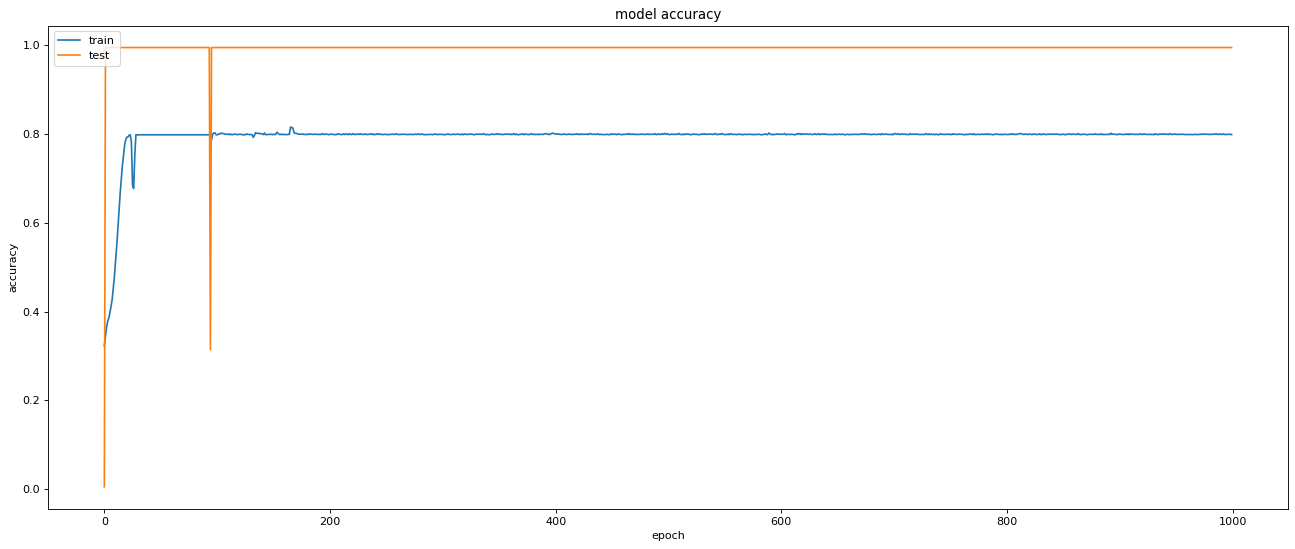

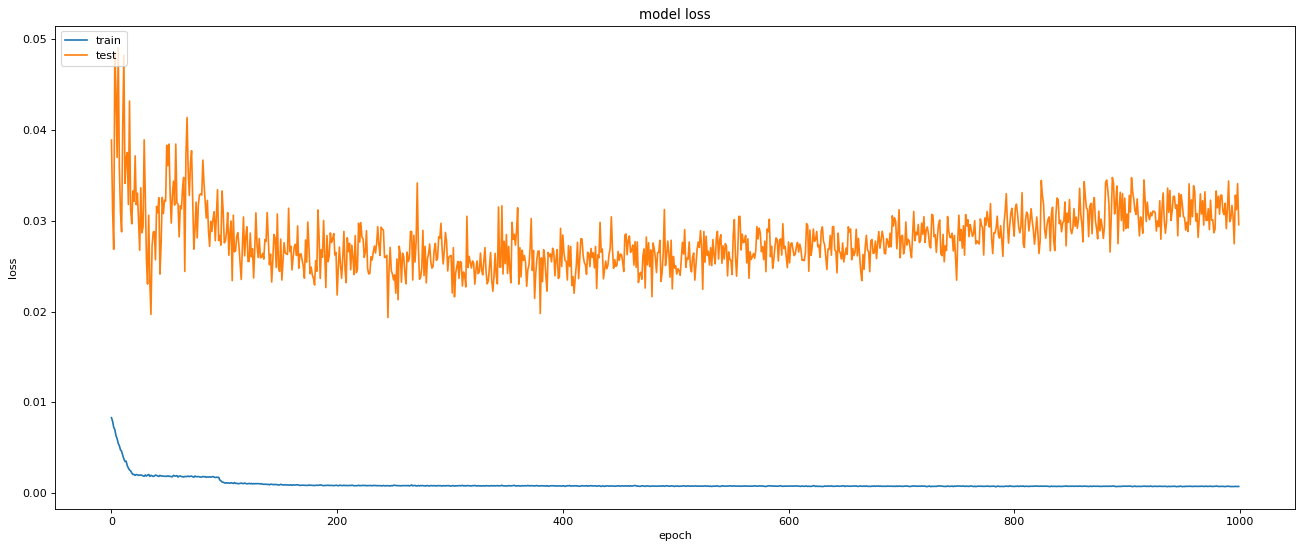

In [33]:
# list all data in history
print(history_D.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history_D.history['accuracy'])
plt.plot(history_D.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history_D.history['loss'])
plt.plot(history_D.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#  ------------------------   Predict data  +  Save to  CSV file--------------------
#  model_Mn
Z_Mn = re_model_Mn.predict(X_predict_Mn)
# model_Wk
Z_Wk = re_model_Wk.predict(X_predict_Wk)
# model_D
Z_D =re_model_D.predict(X_predict_D)
# Save all to CSV

import csv

file_name = 'data/testdata5'
with open(file_name+'.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(Z_Mn)
    writer.writerows(Z_Wk)
    writer.writerows(Z_D)

In [61]:
# --------------------------  plot graph --------------------------
#     Y_train_Mn   Y_train_Wk   Y_train_D     compare     Z_Mn    Z_Wk    Z_D
Sr_Y_Mn=[]
Sr_Y_Wk=[]
Sr_Y_D=[]

Sr_Z_Mn=[]
Sr_Z_Wk=[]
Sr_Z_D=[]

#  --------  Y_train_Mn  to  serie Y _Mn----------
for i in range(Y_train_Mn .shape[0]):
    if i==0: 
        for j in range(Y_train_Mn.shape[1]):
            Sr_Y_Mn.append(Y_train_Mn[i,j,:])
    else:
        Sr_Y_Mn.append(Y_train_Mn[i,-1,:])
        
print(np.array(Sr_Y_Mn).shape,'\n')
#  --------  Z_Mn  to  serie Z _Mn----------
for i in range(Z_Mn.shape[0]):
    if i==0: 
        for j in range(Z_Mn .shape[1]):
            Sr_Z_Mn.append(Z_Mn[i,j,:])
    else:
        Sr_Z_Mn.append(Z_Mn[i,-1,:])
print(np.array(Sr_Z_Mn).shape,'\n')

#  --------  Y_train_Wk  to  serie Y _Wk----------
for i in range(Y_train_Wk .shape[0]):
    if i==0: 
        for j in range(Y_train_Wk .shape[1]):
            Sr_Y_Wk.append(Y_train_Wk[i,j,:])
    else:
        Sr_Y_Wk.append(Y_train_Wk[i,-1,:])
print(np.array(Sr_Y_Wk).shape,'\n')
#  --------  Z_Wk  to  serie Z _Wk----------
for i in range(Z_Wk.shape[0]):
    if i==0: 
        for j in range(Z_Wk .shape[1]):
            Sr_Z_Wk.append(Z_Wk[i,j,:])
    else:
        Sr_Z_Wk.append(Z_Wk[i,-1,:])
print(np.array(Sr_Z_Wk).shape,'\n')

#  --------  Y_train_D  to  serie Y _D----------
for i in range(Y_train_D.shape[0]):
    if i==0: 
        for j in range(Y_train_D .shape[1]):
            Sr_Y_D.append(Y_train_D[i,j,:])
    else:
        Sr_Y_D.append(Y_train_D[i,-1,:])
print(np.array(Sr_Y_D).shape,'\n')
#  --------  Z_Mn  to  serie Z ----------
for i in range(Z_D.shape[0]):
    if i==0: 
        for j in range(Z_D.shape[1]):
            Sr_Z_D.append(Z_D[i,j,:])
    else:
        Sr_Z_D.append(Z_D[i,-1,:])
print(np.array(Sr_Z_D).shape,'\n')

# Serie data  to dataframe
df_Y_Mn = pd.DataFrame(Sr_Y_Mn, columns =['High', 'Low', 'Close'])
df_Z_Mn = pd.DataFrame(Sr_Z_Mn, columns =['High', 'Low', 'Close'])

df_Y_Wk = pd.DataFrame(Sr_Y_Wk, columns =['High', 'Low', 'Close'])
df_Z_Wk = pd.DataFrame(Sr_Z_Wk, columns =['High', 'Low', 'Close'])

df_Y_D = pd.DataFrame(Sr_Y_D, columns =['High', 'Low', 'Close'])
df_Z_D = pd.DataFrame(Sr_Z_D, columns =['High', 'Low', 'Close'])

print('Mn','\n')
df_Y_Mn.info()
df_Z_Mn.info()

print('Wk','\n')
df_Y_Wk.info()
df_Z_Wk.info()

print('D','\n')
df_Y_D.info()
df_Z_D.info()

print(df_Y_Mn)
print(df_Z_Mn)

print(df_Y_Wk)
print(df_Z_Wk)

print(df_Y_D)
print(df_Z_D)

(1207, 3) 

(1207, 3) 

(1206, 3) 

(1206, 3) 

(1206, 3) 

(1206, 3) 

Mn 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1207 non-null   float64
 1   Low     1207 non-null   float64
 2   Close   1207 non-null   float64
dtypes: float64(3)
memory usage: 28.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1207 non-null   float64
 1   Low     1207 non-null   float64
 2   Close   1207 non-null   float64
dtypes: float64(3)
memory usage: 28.4 KB
Wk 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1206 non-null   float64
 1   Low     1206 non-null   float64


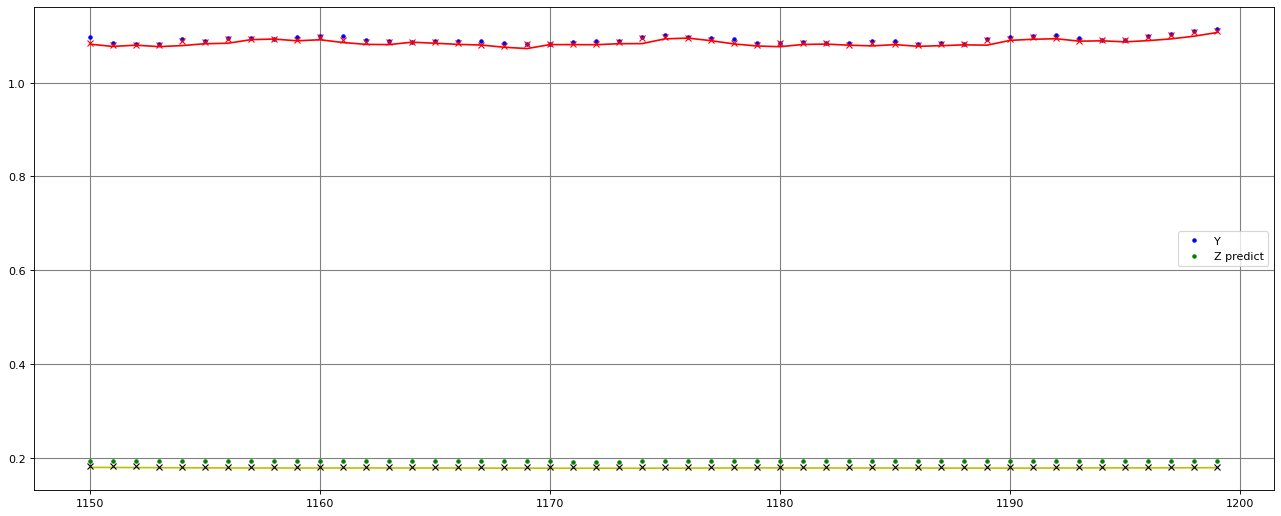

In [65]:
#Mn
space = 50
start = 1150
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(df_Y_Mn['High'][start:stop], 'b.')
plt.plot(df_Z_Mn['High'][start:stop], 'g.')

plt.plot(df_Y_Mn['Low'][start:stop], 'r')
plt.plot(df_Z_Mn['Low'][start:stop], 'y')

plt.plot(df_Y_Mn['Close'][start:stop], 'rx')
plt.plot(df_Z_Mn['Close'][start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['Y', 'Z predict'])
plt.show()

In [129]:
from keras.models import load_model

In [130]:
Load_model_Mn = load_model('data/LSTM_ohlc_Mn_ep2000.h5')
Load_model_Wk = load_model('data/LSTM_ohlc_Wk_ep2000.h5')
Load_model_D = load_model('data/LSTM_ohlc_D_ep2000.h5')

In [87]:
# Y_predict
Z_Mn = model_Mn.predict(X_train_Mn)
#print('Mn predict = ',Z_Mn)
Z_Wk = model_Mn.predict(X_train_Wk)
#print('Wk predict = ',Z_Wk)
Z_D = model_Mn.predict(X_train_D)
#print('D predict = ',Z_D)

#------- รวมข้อมูลพยากรณ์ ---------------
Z_Mn=np.concatenate((Z_Mn, Zpredict_Mn))
Z_Wk=np.concatenate((Z_Wk, Zpredict_Wk))
Z_D=np.concatenate((Z_D, Zpredict_D))

# split price ohlc  Mn    For compare  Y_train  VS Y_predict
OpenZ_Mn = Z_Mn[:,0:1]
HighZ_Mn = Z_Mn[:,1:2]
LowZ_Mn = Z_Mn[:,2:3]
CloseZ_Mn = Z_Mn[:,3:4]

OpenX_Mn = Y_train_Mn[:,0:1]
HighX_Mn= Y_train_Mn[:,1:2]
LowX_Mn= Y_train_Mn[:,2:3]
CloseX_Mn= Y_train_Mn[:,3:4]

# split price ohlc  Wk
OpenZ_Wk = Z_Wk[:,0:1]
HighZ_Wk = Z_Wk[:,1:2]
LowZ_Wk = Z_Wk[:,2:3]
CloseZ_Wk = Z_Wk[:,3:4]

OpenX_Wk = Y_train_Wk[:,0:1]
HighX_Wk= Y_train_Wk[:,1:2]
LowX_Wk= Y_train_Wk[:,2:3]
CloseX_Wk= Y_train_Wk[:,3:4]

# split price ohlc  D
OpenZ_D = Z_D[:,0:1]
HighZ_D = Z_D[:,1:2]
LowZ_D = Z_D[:,2:3]
CloseZ_D = Z_D[:,3:4]

OpenX_D = Y_train_D[:,0:1]
HighX_D= Y_train_D[:,1:2]
LowX_D= Y_train_D[:,2:3]
CloseX_D= Y_train_D[:,3:4]

In [88]:
print(len(Y_train_D))
print(len(Z_D))

1372
1373


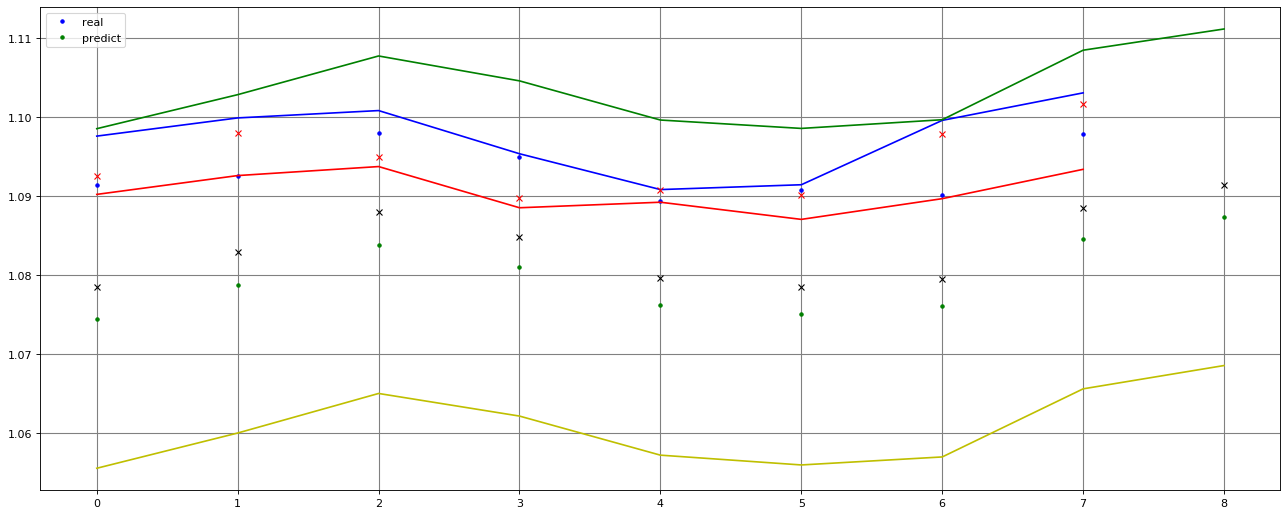

In [90]:
#Day
space = 10
start = 1364
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_D[start:stop], 'b.')
plt.plot(OpenZ_D[start:stop], 'g.')

plt.plot(HighX_D[start:stop], 'b')
plt.plot(HighZ_D[start:stop], 'g')

plt.plot(LowX_D[start:stop], 'r')
plt.plot(LowZ_D[start:stop], 'y')

plt.plot(CloseX_D[start:stop], 'rx')
plt.plot(CloseZ_D[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

In [93]:
print(Y_train_D[1370:,:])
print(Z_D[1370:,:])

[[1.09013 1.09954 1.08964 1.09781]
 [1.0978  1.10302 1.09335 1.10162]]
[[1.0760931 1.0996224 1.0569783 1.0795385]
 [1.084512  1.108414  1.0655906 1.0884855]
 [1.0873708 1.1110971 1.0685376 1.0913299]]


In [94]:
print(len(Y_train_Wk))
print(len(Z_Wk))

852
853


In [26]:
#Week
space = 50
start = 0
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Wk[start:stop], 'b.')
plt.plot(OpenZ_Wk[start:stop], 'g.')

plt.plot(HighX_Wk[start:stop], 'b')
plt.plot(HighZ_Wk[start:stop], 'g')

plt.plot(LowX_Wk[start:stop], 'r')
plt.plot(LowZ_Wk[start:stop], 'y')

plt.plot(CloseX_Wk[start:stop], 'rx')
plt.plot(CloseZ_Wk[start:stop], 'k_')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()



NameError: name 'OpenX_Wk' is not defined

<Figure size 1600x640 with 0 Axes>

In [96]:
print(len(Y_train_Mn))
print(len(Z_Mn))

249
250


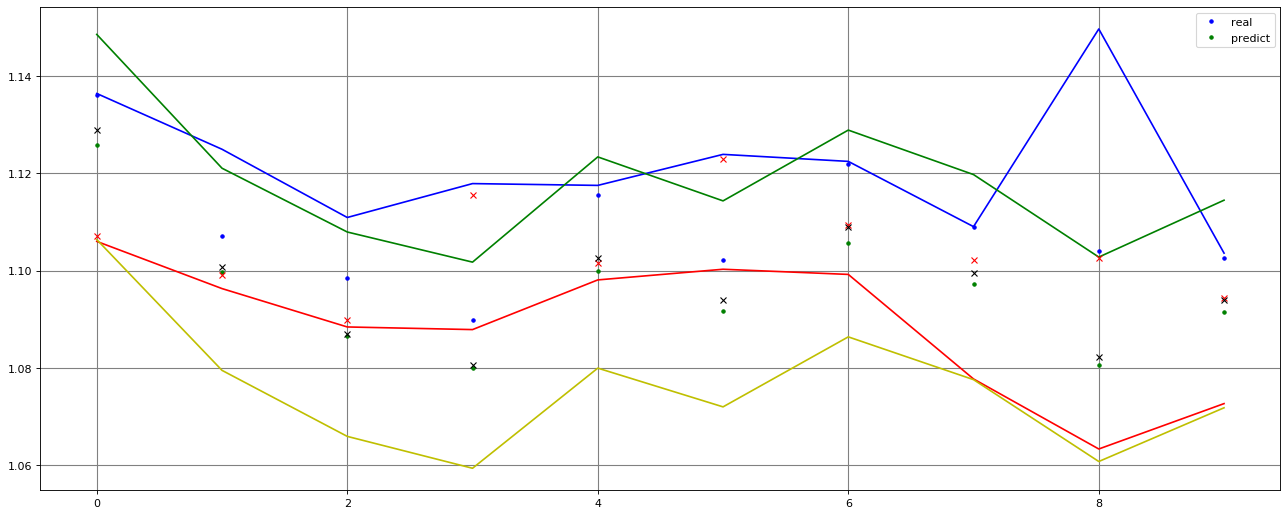

In [61]:
#month
space = 10
start = 239
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Mn[start:stop], 'b.')
plt.plot(OpenZ_Mn[start:stop], 'g.')

plt.plot(HighX_Mn[start:stop], 'b')
plt.plot(HighZ_Mn[start:stop], 'g')

plt.plot(LowX_Mn[start:stop], 'r')
plt.plot(LowZ_Mn[start:stop], 'y')

plt.plot(CloseX_Mn[start:stop], 'rx')
plt.plot(CloseZ_Mn[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

<class 'numpy.ndarray'>
[[1.0498  1.0728  1.0285  1.0643 ]
 [1.0643  1.0912  1.0438  1.0553 ]
 [1.05529 1.0591  1.0036  1.0101 ]
 [1.0101  1.0297  0.999   1.009  ]
 [1.00899 1.0414  0.9735  0.9773 ]
 [0.9773  1.00899 0.939   0.9708 ]
 [0.9708  0.99    0.9483  0.9621 ]
 [0.9621  0.975   0.9033  0.9122 ]
 [0.9122  0.941   0.885   0.9293 ]
 [0.9293  0.97    0.9273  0.9509 ]
 [0.9509  0.9599  0.9194  0.9238 ]
 [0.9238  0.9294  0.8871  0.8953 ]
 [0.8953  0.9035  0.8443  0.8839 ]
 [0.8839  0.8856  0.823   0.8404 ]
 [0.8404  0.8787  0.8371  0.8575 ]
 [0.8575  0.9431  0.8569  0.9421 ]
 [0.9421  0.9594  0.912   0.9265 ]
 [0.9265  0.9444  0.9017  0.9178 ]
 [0.9178  0.938   0.8741  0.8741 ]
 [0.8741  0.9088  0.8699  0.8916 ]
 [0.8916  0.9004  0.8503  0.8568 ]
 [0.8568  0.867   0.8413  0.8501 ]
 [0.8501  0.8823  0.8352  0.8743 ]
 [0.8743  0.924   0.8723  0.9162 ]
 [0.9162  0.9331  0.8826  0.9101 ]
 [0.9101  0.924   0.887   0.904  ]
 [0.904   0.9118  0.8737  0.8964 ]
 [0.8964  0.908   0.874   0.893

In [85]:
#print(Y_train_Mn)
print(Zpredict_Mn)

Y_full = np.concatenate((Y_train_Mn, Zpredict_Mn))
print(Y_full)

(249, 4)
(1, 4)
[[1.0729146 1.0953888 1.053161  1.0749054]]
[[1.0498     1.0728     1.0285     1.0643    ]
 [1.0643     1.0912     1.0438     1.0553    ]
 [1.05529    1.0591     1.0036     1.0101    ]
 [1.0101     1.0297     0.999      1.009     ]
 [1.00899    1.0414     0.9735     0.9773    ]
 [0.9773     1.00899    0.939      0.9708    ]
 [0.9708     0.99       0.9483     0.9621    ]
 [0.9621     0.975      0.9033     0.9122    ]
 [0.9122     0.941      0.885      0.9293    ]
 [0.9293     0.97       0.9273     0.9509    ]
 [0.9509     0.9599     0.9194     0.9238    ]
 [0.9238     0.9294     0.8871     0.8953    ]
 [0.8953     0.9035     0.8443     0.8839    ]
 [0.8839     0.8856     0.823      0.8404    ]
 [0.8404     0.8787     0.8371     0.8575    ]
 [0.8575     0.9431     0.8569     0.9421    ]
 [0.9421     0.9594     0.912      0.9265    ]
 [0.9265     0.9444     0.9017     0.9178    ]
 [0.9178     0.938      0.8741     0.8741    ]
 [0.8741     0.9088     0.8699     0.8916    ]
